In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import glob
import h5py

# pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler

# sklearn functions
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, GroupShuffleSplit
from utils import plot_roc_curve

# load functions from nitorch
sys.path.insert(0,"/analysis/fabiane/phd/nitorch/")
from nitorch.data import load_nifti
from nitorch.transforms import  ToTensor, SagittalTranslate, SagittalFlip, \
                                AxialTranslate, normalization_factors, Normalize, \
                                IntensityRescale
from nitorch.callbacks import EarlyStopping, ModelCheckpoint
from nitorch.trainer import Trainer
from nitorch.initialization import weights_init
from nitorch.metrics import balanced_accuracy, sensitivity, specificity


# local functions
from training import run, run_inference

In [3]:
torch.__version__

'1.8.1'

### Configurations

In [4]:
# set GPUs
gpu = 2

# hyperparams to draw from, use second line for patch based model
from hyperparameter_options import params as hyperparams
#from hyperparameter_options import params_liu as hyperparams

# path to be used for all data sets
train_data_path = "path/to/data"
# in case data is not stored in hdf5 file use data instead
data = None
# specify names
dataset = "ADNI" # ["ADNI", "UKB", "MS"]
experiment = "baseline" # ["baseline", "PIF", "LIU"]

# augmentations
augmentations = [SagittalFlip(), SagittalTranslate(dist=(-2, 3))]

# Training

In [5]:
num_epochs = 200
normalize = False
retain_metric = balanced_accuracy
metrics = [accuracy_score, balanced_accuracy]

In [6]:
output_dir = "output/path"

###### Starting outer fold 0


/home/fabiane/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# of patients 128, # of healthy controls 118
139
107
###### Starting inner fold 0
{'model': 'ModelA', 'batch_size': 12, 'patience': 12, 'lr': 5e-05}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69063
Time elapsed: 0h:0m:1s
train accuracy_score: 55.40 %
train balanced_accuracy: 49.94 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.700106
[1,    10] loss: 0.69078
Time elapsed: 0h:0m:4s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.704451
[2,    10] loss: 0.68341
Time elapsed: 0h:0m:6s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.706459
[3,    10] loss: 0.69058
Time elapsed: 0h:0m:9s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.699360
[4,    10] loss: 0.68699
Time elapsed: 

[42,    10] loss: 0.68623
Time elapsed: 0h:1m:44s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.703856
[43,    10] loss: 0.67444
Time elapsed: 0h:1m:47s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.707588
[44,    10] loss: 0.68484
Time elapsed: 0h:1m:49s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.705310
[45,    10] loss: 0.68519
Time elapsed: 0h:1m:52s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.705640
[46,    10] loss: 0.68744
Time elapsed: 0h:1m:54s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.709331
[47,    10] loss: 0.68211
Time elapsed: 0h:1m

[85,    10] loss: 0.67341
Time elapsed: 0h:3m:39s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.704990
[86,    10] loss: 0.67942
Time elapsed: 0h:3m:42s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.705098
[87,    10] loss: 0.66800
Time elapsed: 0h:3m:45s
train accuracy_score: 58.27 %
train balanced_accuracy: 51.87 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.702225
[88,    10] loss: 0.67914
Time elapsed: 0h:3m:47s
train accuracy_score: 56.83 %
train balanced_accuracy: 51.80 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.701182
[89,    10] loss: 0.67146
Time elapsed: 0h:3m:50s
train accuracy_score: 53.24 %
train balanced_accuracy: 48.04 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.692007
[90,    10] loss: 0.67396
Time elapsed: 0h:3m

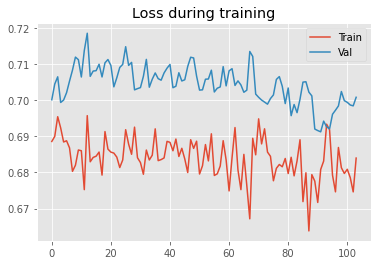

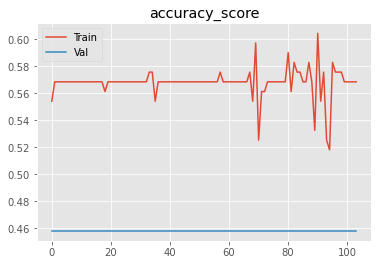

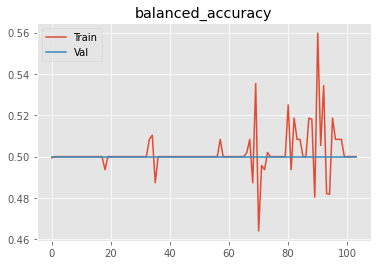

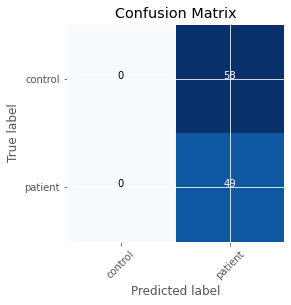

###### Starting inner fold 1
{'model': 'ModelA', 'batch_size': 4, 'patience': 16, 'lr': 0.0001}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69677
[0,    20] loss: 0.66085
[0,    30] loss: 0.75251
Time elapsed: 0h:0m:1s
train accuracy_score: 53.96 %
train balanced_accuracy: 49.67 %
val accuracy_score: 47.66 %
val balanced_accuracy: 51.57 %
Val loss: 0.693656
[1,    10] loss: 0.70135
[1,    20] loss: 0.68976
[1,    30] loss: 0.69682
Time elapsed: 0h:0m:4s
train accuracy_score: 54.68 %
train balanced_accuracy: 51.11 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.697400
[2,    10] loss: 0.68289
[2,    20] loss: 0.71079
[2,    30] loss: 0.72169
Time elapsed: 0h:0m:6s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.80 %
val accuracy_score: 57.01 %
val balanced_accuracy: 59.39 %
Val loss: 0.692182
[3,    10] loss: 0.69340
[3,    20] loss: 0.68681
[3,    30] loss: 0.70534
Time elapsed: 0h:0m:9s
train accuracy_score: 51.08 %
tra

val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.697896
[34,    10] loss: 0.67205
[34,    20] loss: 0.70629
[34,    30] loss: 0.70089
Time elapsed: 0h:1m:33s
train accuracy_score: 55.40 %
train balanced_accuracy: 50.34 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.696975
[35,    10] loss: 0.68563
[35,    20] loss: 0.61306
[35,    30] loss: 0.77087
Time elapsed: 0h:1m:36s
train accuracy_score: 56.12 %
train balanced_accuracy: 49.37 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.695441
[36,    10] loss: 0.69362
[36,    20] loss: 0.68504
[36,    30] loss: 0.68903
Time elapsed: 0h:1m:38s
train accuracy_score: 56.12 %
train balanced_accuracy: 50.37 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.695517
[37,    10] loss: 0.68906
[37,    20] loss: 0.67785
[37,    30] loss: 0.66786
Time elapsed: 0h:1m:41s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %


val accuracy_score: 76.64 %
val balanced_accuracy: 76.71 %
Val loss: 0.537673
[68,    10] loss: 0.50564
[68,    20] loss: 0.51507
[68,    30] loss: 0.49457
Time elapsed: 0h:3m:4s
train accuracy_score: 73.38 %
train balanced_accuracy: 72.77 %
val accuracy_score: 71.96 %
val balanced_accuracy: 73.66 %
Val loss: 0.580774
[69,    10] loss: 0.44697
[69,    20] loss: 0.67291
[69,    30] loss: 0.56693
Time elapsed: 0h:3m:7s
train accuracy_score: 67.63 %
train balanced_accuracy: 66.31 %
val accuracy_score: 70.09 %
val balanced_accuracy: 71.94 %
Val loss: 0.615161
[70,    10] loss: 0.54823
[70,    20] loss: 0.44053
[70,    30] loss: 0.52185
Time elapsed: 0h:3m:10s
train accuracy_score: 78.42 %
train balanced_accuracy: 77.00 %
val accuracy_score: 76.64 %
val balanced_accuracy: 76.07 %
Val loss: 0.508082
[71,    10] loss: 0.62344
[71,    20] loss: 0.49243
[71,    30] loss: 0.53416
Time elapsed: 0h:3m:12s
train accuracy_score: 72.66 %
train balanced_accuracy: 72.34 %
val accuracy_score: 71.96 %
va

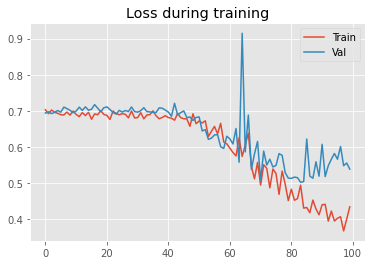

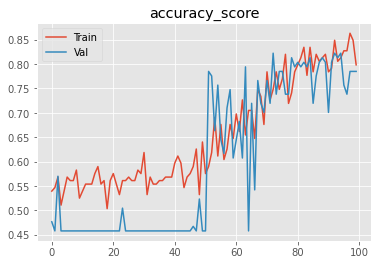

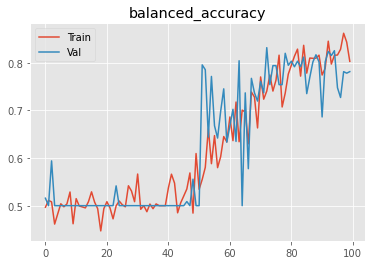

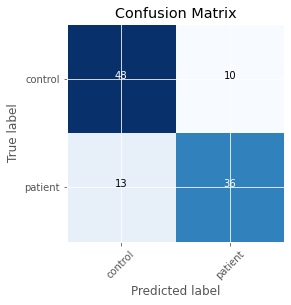

###### Starting inner fold 2
{'model': 'ModelB', 'batch_size': 6, 'patience': 16, 'lr': 0.0001}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.69245
[0,    20] loss: 0.69427
Time elapsed: 0h:0m:2s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.703251
[1,    10] loss: 0.68031
[1,    20] loss: 0.71138
Time elapsed: 0h:0m:5s
train accuracy_score: 56.12 %
train balanced_accuracy: 49.37 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.698055
[2,    10] loss: 0.67401
[2,    20] loss: 0.71703
Time elapsed: 0h:0m:8s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.698847
[3,    10] loss: 0.68489
[3,    20] loss: 0.69913
Time elapsed: 0h:0m:11s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 

Time elapsed: 0h:2m:7s
train accuracy_score: 72.66 %
train balanced_accuracy: 70.34 %
val accuracy_score: 75.70 %
val balanced_accuracy: 75.53 %
Val loss: 0.585756
[38,    10] loss: 0.58438
[38,    20] loss: 0.56535
Time elapsed: 0h:2m:10s
train accuracy_score: 67.63 %
train balanced_accuracy: 65.31 %
val accuracy_score: 60.75 %
val balanced_accuracy: 63.79 %
Val loss: 0.646794
[39,    10] loss: 0.59545
[39,    20] loss: 0.58447
Time elapsed: 0h:2m:14s
train accuracy_score: 70.50 %
train balanced_accuracy: 70.04 %
val accuracy_score: 76.64 %
val balanced_accuracy: 77.66 %
Val loss: 0.569628
[40,    10] loss: 0.65239
[40,    20] loss: 0.54051
Time elapsed: 0h:2m:17s
train accuracy_score: 64.75 %
train balanced_accuracy: 62.97 %
val accuracy_score: 64.49 %
val balanced_accuracy: 66.92 %
Val loss: 0.634275
[41,    10] loss: 0.61871
[41,    20] loss: 0.58551
Time elapsed: 0h:2m:20s
train accuracy_score: 68.35 %
train balanced_accuracy: 66.34 %
val accuracy_score: 77.57 %
val balanced_accur

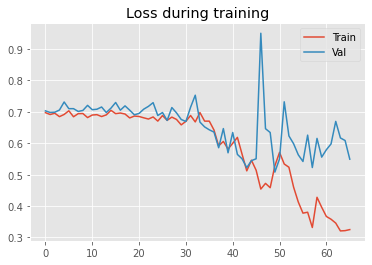

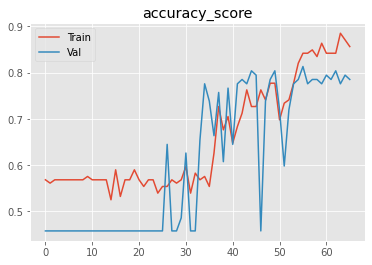

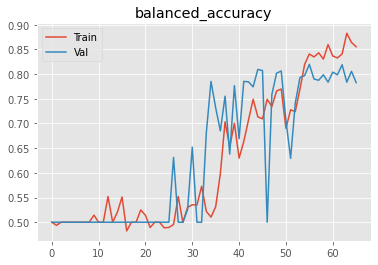

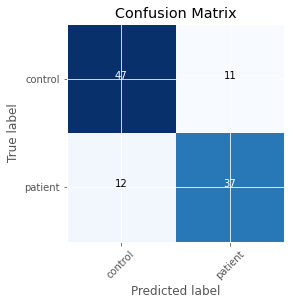

###### Starting inner fold 3
{'model': 'ModelB', 'batch_size': 12, 'patience': 16, 'lr': 5e-05}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.70073
Time elapsed: 0h:0m:2s
train accuracy_score: 46.76 %
train balanced_accuracy: 51.56 %
val accuracy_score: 46.73 %
val balanced_accuracy: 50.55 %
Val loss: 0.694292
[1,    10] loss: 0.69245
Time elapsed: 0h:0m:5s
train accuracy_score: 54.68 %
train balanced_accuracy: 48.30 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.713334
[2,    10] loss: 0.68814
Time elapsed: 0h:0m:9s
train accuracy_score: 56.83 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.698860
[3,    10] loss: 0.68698
Time elapsed: 0h:0m:13s
train accuracy_score: 57.55 %
train balanced_accuracy: 51.03 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.702804
[4,    10] loss: 0.68551
Time elapsed: 0h:0m:16s
train accuracy_score: 56.83 %
train balanc

val accuracy_score: 46.73 %
val balanced_accuracy: 50.86 %
Val loss: 0.686265
[43,    10] loss: 0.66694
Time elapsed: 0h:2m:30s
train accuracy_score: 58.99 %
train balanced_accuracy: 55.51 %
val accuracy_score: 47.66 %
val balanced_accuracy: 51.72 %
Val loss: 0.686071
[44,    10] loss: 0.66112
Time elapsed: 0h:2m:33s
train accuracy_score: 58.99 %
train balanced_accuracy: 55.51 %
val accuracy_score: 62.62 %
val balanced_accuracy: 65.04 %
Val loss: 0.676317
[45,    10] loss: 0.66805
Time elapsed: 0h:2m:37s
train accuracy_score: 56.83 %
train balanced_accuracy: 54.21 %
val accuracy_score: 62.62 %
val balanced_accuracy: 65.04 %
Val loss: 0.674954
[46,    10] loss: 0.68843
Time elapsed: 0h:2m:40s
train accuracy_score: 59.71 %
train balanced_accuracy: 56.94 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.711477
[47,    10] loss: 0.66197
Time elapsed: 0h:2m:44s
train accuracy_score: 59.71 %
train balanced_accuracy: 55.54 %
val accuracy_score: 61.68 %
val balanced_accu

val accuracy_score: 83.18 %
val balanced_accuracy: 83.53 %
Val loss: 0.490920
[86,    10] loss: 0.51925
Time elapsed: 0h:4m:53s
train accuracy_score: 74.10 %
train balanced_accuracy: 71.60 %
val accuracy_score: 82.24 %
val balanced_accuracy: 82.67 %
Val loss: 0.491816
[87,    10] loss: 0.44046
Time elapsed: 0h:4m:57s
train accuracy_score: 77.70 %
train balanced_accuracy: 76.97 %
val accuracy_score: 83.18 %
val balanced_accuracy: 83.53 %
Val loss: 0.482640
[88,    10] loss: 0.45487
Time elapsed: 0h:5m:0s
train accuracy_score: 79.14 %
train balanced_accuracy: 78.04 %
val accuracy_score: 80.37 %
val balanced_accuracy: 80.95 %
Val loss: 0.483358
[89,    10] loss: 0.44516
Time elapsed: 0h:5m:4s
train accuracy_score: 76.26 %
train balanced_accuracy: 75.11 %
val accuracy_score: 73.83 %
val balanced_accuracy: 75.07 %
Val loss: 0.510258
[90,    10] loss: 0.42133
Time elapsed: 0h:5m:7s
train accuracy_score: 79.86 %
train balanced_accuracy: 78.67 %
val accuracy_score: 83.18 %
val balanced_accurac

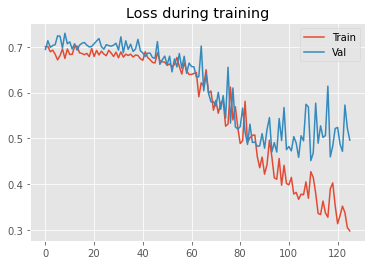

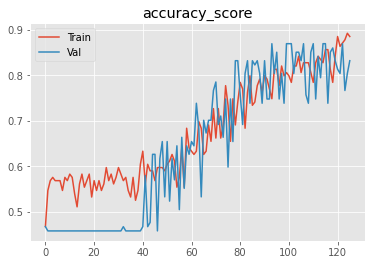

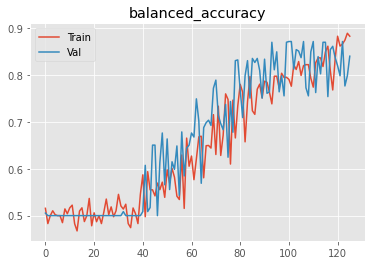

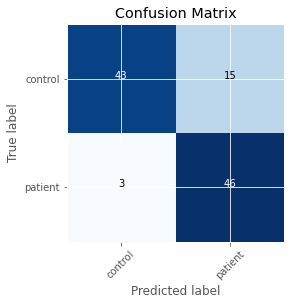

###### Starting inner fold 4
{'model': 'ModelB', 'batch_size': 4, 'patience': 12, 'lr': 0.0001}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.70089
[0,    20] loss: 0.65729
[0,    30] loss: 0.75422
Time elapsed: 0h:0m:2s
train accuracy_score: 54.68 %
train balanced_accuracy: 48.30 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.693269
[1,    10] loss: 0.69406
[1,    20] loss: 0.69158
[1,    30] loss: 0.71890
Time elapsed: 0h:0m:5s
train accuracy_score: 53.24 %
train balanced_accuracy: 51.04 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.695225
[2,    10] loss: 0.70126
[2,    20] loss: 0.67984
[2,    30] loss: 0.69018
Time elapsed: 0h:0m:8s
train accuracy_score: 55.40 %
train balanced_accuracy: 48.73 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.714219
[3,    10] loss: 0.69131
[3,    20] loss: 0.72299
[3,    30] loss: 0.70258
Time elapsed: 0h:0m:11s
train accuracy_score: 50.36 %
tr

Time elapsed: 0h:1m:52s
train accuracy_score: 55.40 %
train balanced_accuracy: 51.34 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.698383
[34,    10] loss: 0.64460
[34,    20] loss: 0.68991
[34,    30] loss: 0.72246
Time elapsed: 0h:1m:55s
train accuracy_score: 57.55 %
train balanced_accuracy: 54.84 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.699452
[35,    10] loss: 0.66947
[35,    20] loss: 0.66860
[35,    30] loss: 0.64555
Time elapsed: 0h:1m:58s
train accuracy_score: 57.55 %
train balanced_accuracy: 51.43 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.683371
[36,    10] loss: 0.67034
[36,    20] loss: 0.69466
[36,    30] loss: 0.63524
Time elapsed: 0h:2m:1s
train accuracy_score: 61.15 %
train balanced_accuracy: 61.01 %
val accuracy_score: 45.79 %
val balanced_accuracy: 50.00 %
Val loss: 0.792885
[37,    10] loss: 0.68216
[37,    20] loss: 0.65524
[37,    30] loss: 0.67573
Time elapsed: 0h:2m:5s
train 

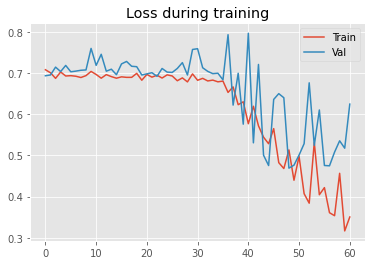

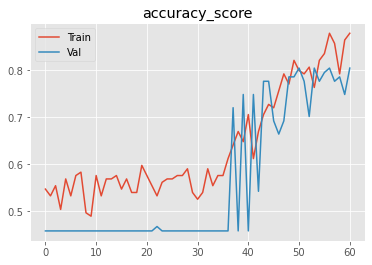

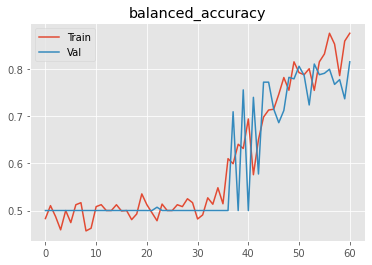

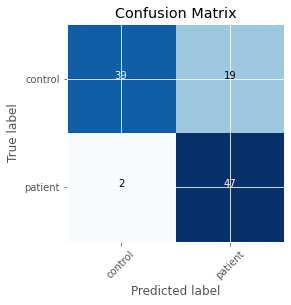

Finished outer fold.
{'final_acc': 0.8400774102744546, 'best_acc': 0.8713933849401829, 'final_iter': 126, 'best_iter': 123, 'params': {'model': 'ModelB', 'batch_size': 12, 'patience': 16, 'lr': 5e-05}, 'inner_fold_idx': 3}
###### Starting outer fold 1
# of patients 109, # of healthy controls 125
139
95
###### Starting inner fold 0
{'model': 'ModelA', 'batch_size': 4, 'patience': 16, 'lr': 0.0001}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.68532
[0,    20] loss: 0.71879
[0,    30] loss: 0.70512
Time elapsed: 0h:0m:1s
train accuracy_score: 51.80 %
train balanced_accuracy: 51.68 %
val accuracy_score: 42.11 %
val balanced_accuracy: 50.00 %
Val loss: 0.700770
[1,    10] loss: 0.70726
[1,    20] loss: 0.70326
[1,    30] loss: 0.70208
Time elapsed: 0h:0m:3s
train accuracy_score: 46.76 %
train balanced_accuracy: 46.78 %
val accuracy_score: 42.11 %
val balanced_accuracy: 50.00 %
Val loss: 0.698792
[2,    10] loss: 0.71087
[2,    20] loss: 0.68893
[2,    30] loss:

[32,    10] loss: 0.69149
[32,    20] loss: 0.69899
[32,    30] loss: 0.69208
Time elapsed: 0h:1m:19s
train accuracy_score: 50.36 %
train balanced_accuracy: 50.48 %
val accuracy_score: 42.11 %
val balanced_accuracy: 50.00 %
Val loss: 0.693798
[33,    10] loss: 0.69352
[33,    20] loss: 0.69087
[33,    30] loss: 0.69174
Time elapsed: 0h:1m:22s
train accuracy_score: 51.80 %
train balanced_accuracy: 51.93 %
val accuracy_score: 67.37 %
val balanced_accuracy: 65.34 %
Val loss: 0.691851
[34,    10] loss: 0.70177
[34,    20] loss: 0.69088
[34,    30] loss: 0.69310
Time elapsed: 0h:1m:24s
train accuracy_score: 44.60 %
train balanced_accuracy: 44.55 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.689149
[35,    10] loss: 0.69487
[35,    20] loss: 0.69506
[35,    30] loss: 0.69148
Time elapsed: 0h:1m:27s
train accuracy_score: 48.20 %
train balanced_accuracy: 48.02 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.687938
[36,    10] loss: 0.70034
[3

[66,    10] loss: 0.68457
[66,    20] loss: 0.69432
[66,    30] loss: 0.68885
Time elapsed: 0h:2m:42s
train accuracy_score: 53.96 %
train balanced_accuracy: 54.00 %
val accuracy_score: 64.21 %
val balanced_accuracy: 64.32 %
Val loss: 0.683891
[67,    10] loss: 0.69343
[67,    20] loss: 0.68625
[67,    30] loss: 0.68342
Time elapsed: 0h:2m:45s
train accuracy_score: 56.12 %
train balanced_accuracy: 56.04 %
val accuracy_score: 51.58 %
val balanced_accuracy: 56.48 %
Val loss: 0.686872
[68,    10] loss: 0.68602
[68,    20] loss: 0.69027
[68,    30] loss: 0.68656
Time elapsed: 0h:2m:47s
train accuracy_score: 58.99 %
train balanced_accuracy: 59.04 %
val accuracy_score: 42.11 %
val balanced_accuracy: 50.00 %
Val loss: 0.699430
[69,    10] loss: 0.69903
[69,    20] loss: 0.68495
[69,    30] loss: 0.68298
Time elapsed: 0h:2m:50s
train accuracy_score: 54.68 %
train balanced_accuracy: 54.48 %
val accuracy_score: 72.63 %
val balanced_accuracy: 70.23 %
Val loss: 0.678326
[70,    10] loss: 0.68610
[7

[100,    10] loss: 0.57782
[100,    20] loss: 0.66540
[100,    30] loss: 0.58643
Time elapsed: 0h:4m:5s
train accuracy_score: 73.38 %
train balanced_accuracy: 73.41 %
val accuracy_score: 66.32 %
val balanced_accuracy: 68.86 %
Val loss: 0.567268
[101,    10] loss: 0.57610
[101,    20] loss: 0.54654
[101,    30] loss: 0.55763
Time elapsed: 0h:4m:8s
train accuracy_score: 71.94 %
train balanced_accuracy: 71.92 %
val accuracy_score: 46.32 %
val balanced_accuracy: 53.64 %
Val loss: 0.719698
[102,    10] loss: 0.55292
[102,    20] loss: 0.56673
[102,    30] loss: 0.51293
Time elapsed: 0h:4m:10s
train accuracy_score: 76.98 %
train balanced_accuracy: 76.96 %
val accuracy_score: 74.74 %
val balanced_accuracy: 75.45 %
Val loss: 0.513749
[103,    10] loss: 0.44292
[103,    20] loss: 0.68590
[103,    30] loss: 0.53158
Time elapsed: 0h:4m:13s
train accuracy_score: 76.26 %
train balanced_accuracy: 76.23 %
val accuracy_score: 81.05 %
val balanced_accuracy: 78.18 %
Val loss: 0.464219
[104,    10] loss:

val accuracy_score: 83.16 %
val balanced_accuracy: 81.36 %
Val loss: 0.392590
[134,    10] loss: 0.38371
[134,    20] loss: 0.42505
[134,    30] loss: 0.53720
Time elapsed: 0h:5m:28s
train accuracy_score: 80.58 %
train balanced_accuracy: 80.55 %
val accuracy_score: 70.53 %
val balanced_accuracy: 73.52 %
Val loss: 0.527039
[135,    10] loss: 0.51191
[135,    20] loss: 0.36856
[135,    30] loss: 0.41501
Time elapsed: 0h:5m:30s
train accuracy_score: 82.01 %
train balanced_accuracy: 82.00 %
val accuracy_score: 71.58 %
val balanced_accuracy: 74.43 %
Val loss: 0.489163
[136,    10] loss: 0.39796
[136,    20] loss: 0.42870
[136,    30] loss: 0.41031
Time elapsed: 0h:5m:33s
train accuracy_score: 81.29 %
train balanced_accuracy: 81.33 %
val accuracy_score: 85.26 %
val balanced_accuracy: 82.50 %
Val loss: 0.387290
[137,    10] loss: 0.49701
[137,    20] loss: 0.40776
[137,    30] loss: 0.33293
Time elapsed: 0h:5m:35s
train accuracy_score: 79.86 %
train balanced_accuracy: 79.86 %
val accuracy_sco

[167,    20] loss: 0.36365
[167,    30] loss: 0.45860
Time elapsed: 0h:6m:49s
train accuracy_score: 83.45 %
train balanced_accuracy: 83.44 %
val accuracy_score: 84.21 %
val balanced_accuracy: 81.25 %
Val loss: 0.365811
[168,    10] loss: 0.33779
[168,    20] loss: 0.37823
[168,    30] loss: 0.35656
Time elapsed: 0h:6m:51s
train accuracy_score: 88.49 %
train balanced_accuracy: 88.48 %
val accuracy_score: 84.21 %
val balanced_accuracy: 83.30 %
Val loss: 0.351825
[169,    10] loss: 0.33806
[169,    20] loss: 0.38510
[169,    30] loss: 0.29460
Time elapsed: 0h:6m:54s
train accuracy_score: 87.05 %
train balanced_accuracy: 87.06 %
val accuracy_score: 84.21 %
val balanced_accuracy: 81.59 %
Val loss: 0.352016
[170,    10] loss: 0.41465
[170,    20] loss: 0.33183
[170,    30] loss: 0.24944
Time elapsed: 0h:6m:56s
train accuracy_score: 86.33 %
train balanced_accuracy: 86.30 %
val accuracy_score: 85.26 %
val balanced_accuracy: 82.84 %
Val loss: 0.347800
[171,    10] loss: 0.37475
[171,    20] los

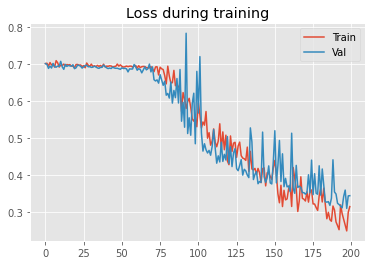

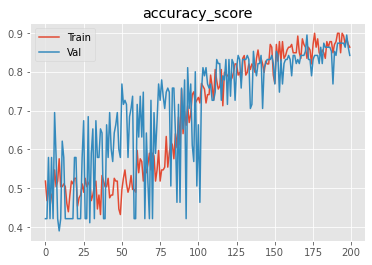

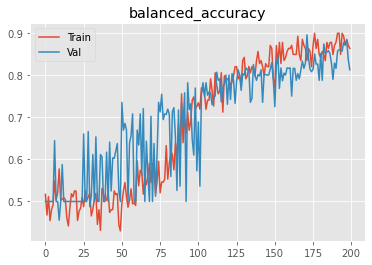

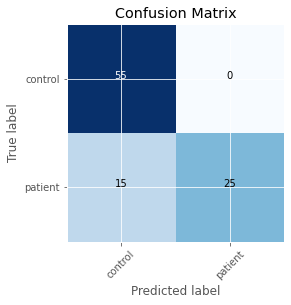

###### Starting inner fold 1
{'model': 'ModelA', 'batch_size': 4, 'patience': 16, 'lr': 5e-05}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69697
[0,    20] loss: 0.69605
[0,    30] loss: 0.69429
Time elapsed: 0h:0m:1s
train accuracy_score: 46.76 %
train balanced_accuracy: 46.83 %
val accuracy_score: 42.11 %
val balanced_accuracy: 50.00 %
Val loss: 0.694814
[1,    10] loss: 0.68976
[1,    20] loss: 0.69889
[1,    30] loss: 0.70064
Time elapsed: 0h:0m:3s
train accuracy_score: 49.64 %
train balanced_accuracy: 49.96 %
val accuracy_score: 42.11 %
val balanced_accuracy: 50.00 %
Val loss: 0.696093
[2,    10] loss: 0.68874
[2,    20] loss: 0.68998
[2,    30] loss: 0.70084
Time elapsed: 0h:0m:6s
train accuracy_score: 50.36 %
train balanced_accuracy: 50.63 %
val accuracy_score: 42.11 %
val balanced_accuracy: 50.00 %
Val loss: 0.694872
[3,    10] loss: 0.69145
[3,    20] loss: 0.69220
[3,    30] loss: 0.69435
Time elapsed: 0h:0m:8s
train accuracy_score: 56.12 %
trai

val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.685557
[34,    10] loss: 0.68755
[34,    20] loss: 0.69777
[34,    30] loss: 0.68477
Time elapsed: 0h:1m:26s
train accuracy_score: 51.08 %
train balanced_accuracy: 50.77 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.684706
[35,    10] loss: 0.69651
[35,    20] loss: 0.68775
[35,    30] loss: 0.68616
Time elapsed: 0h:1m:28s
train accuracy_score: 50.36 %
train balanced_accuracy: 50.11 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.682921
[36,    10] loss: 0.68864
[36,    20] loss: 0.69638
[36,    30] loss: 0.69488
Time elapsed: 0h:1m:31s
train accuracy_score: 53.96 %
train balanced_accuracy: 53.73 %
val accuracy_score: 70.53 %
val balanced_accuracy: 65.00 %
Val loss: 0.685403
[37,    10] loss: 0.68018
[37,    20] loss: 0.68112
[37,    30] loss: 0.70528
Time elapsed: 0h:1m:33s
train accuracy_score: 58.99 %
train balanced_accuracy: 59.03 %
val accuracy_score: 57.89 %


val accuracy_score: 77.89 %
val balanced_accuracy: 75.45 %
Val loss: 0.525933
[68,    10] loss: 0.55826
[68,    20] loss: 0.65091
[68,    30] loss: 0.52718
Time elapsed: 0h:2m:50s
train accuracy_score: 66.19 %
train balanced_accuracy: 66.21 %
val accuracy_score: 78.95 %
val balanced_accuracy: 75.34 %
Val loss: 0.518702
[69,    10] loss: 0.56009
[69,    20] loss: 0.48200
[69,    30] loss: 0.84700
Time elapsed: 0h:2m:52s
train accuracy_score: 66.19 %
train balanced_accuracy: 66.19 %
val accuracy_score: 78.95 %
val balanced_accuracy: 76.36 %
Val loss: 0.525015
[70,    10] loss: 0.64480
[70,    20] loss: 0.60814
[70,    30] loss: 0.52846
Time elapsed: 0h:2m:55s
train accuracy_score: 71.94 %
train balanced_accuracy: 71.88 %
val accuracy_score: 73.68 %
val balanced_accuracy: 71.82 %
Val loss: 0.529588
[71,    10] loss: 0.59254
[71,    20] loss: 0.53661
[71,    30] loss: 0.55095
Time elapsed: 0h:2m:57s
train accuracy_score: 70.50 %
train balanced_accuracy: 70.50 %
val accuracy_score: 82.11 %


val accuracy_score: 74.74 %
val balanced_accuracy: 72.73 %
Val loss: 0.447321
[102,    10] loss: 0.38366
[102,    20] loss: 0.40405
[102,    30] loss: 0.62310
Time elapsed: 0h:4m:16s
train accuracy_score: 79.86 %
train balanced_accuracy: 79.81 %
val accuracy_score: 78.95 %
val balanced_accuracy: 79.09 %
Val loss: 0.459821
[103,    10] loss: 0.64037
[103,    20] loss: 0.38974
[103,    30] loss: 0.41227
Time elapsed: 0h:4m:18s
train accuracy_score: 82.73 %
train balanced_accuracy: 82.75 %
val accuracy_score: 78.95 %
val balanced_accuracy: 76.36 %
Val loss: 0.446566
[104,    10] loss: 0.38408
[104,    20] loss: 0.54664
[104,    30] loss: 0.39773
Time elapsed: 0h:4m:21s
train accuracy_score: 85.61 %
train balanced_accuracy: 85.63 %
val accuracy_score: 82.11 %
val balanced_accuracy: 79.09 %
Val loss: 0.445696
[105,    10] loss: 0.53265
[105,    20] loss: 0.35931
[105,    30] loss: 0.48057
Time elapsed: 0h:4m:23s
train accuracy_score: 79.14 %
train balanced_accuracy: 79.11 %
val accuracy_sco

[135,    20] loss: 0.26004
[135,    30] loss: 0.37567
Time elapsed: 0h:5m:38s
train accuracy_score: 88.49 %
train balanced_accuracy: 88.48 %
val accuracy_score: 76.84 %
val balanced_accuracy: 76.93 %
Val loss: 0.431510
[136,    10] loss: 0.43437
[136,    20] loss: 0.52650
[136,    30] loss: 0.28330
Time elapsed: 0h:5m:40s
train accuracy_score: 85.61 %
train balanced_accuracy: 85.63 %
val accuracy_score: 80.00 %
val balanced_accuracy: 76.59 %
Val loss: 0.442252
[137,    10] loss: 0.39456
[137,    20] loss: 0.24900
[137,    30] loss: 0.36966
Time elapsed: 0h:5m:43s
train accuracy_score: 87.77 %
train balanced_accuracy: 87.76 %
val accuracy_score: 81.05 %
val balanced_accuracy: 80.23 %
Val loss: 0.414388
[138,    10] loss: 0.39818
[138,    20] loss: 0.28192
[138,    30] loss: 0.31750
Time elapsed: 0h:5m:45s
train accuracy_score: 84.89 %
train balanced_accuracy: 84.89 %
val accuracy_score: 78.95 %
val balanced_accuracy: 78.41 %
Val loss: 0.418975
[139,    10] loss: 0.42232
[139,    20] los

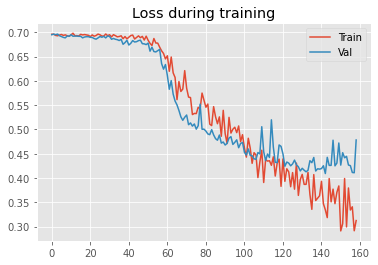

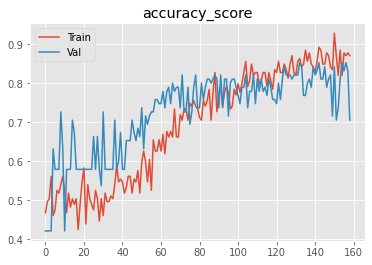

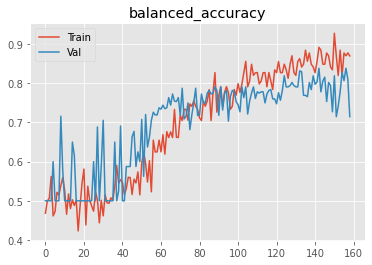

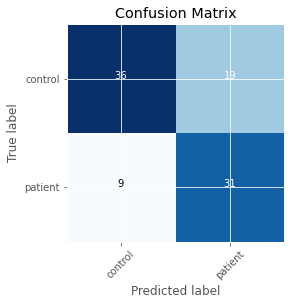

###### Starting inner fold 2
{'model': 'ModelB', 'batch_size': 12, 'patience': 16, 'lr': 5e-05}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.69405
Time elapsed: 0h:0m:2s
train accuracy_score: 48.20 %
train balanced_accuracy: 47.86 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.689244
[1,    10] loss: 0.69454
Time elapsed: 0h:0m:5s
train accuracy_score: 46.04 %
train balanced_accuracy: 45.80 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.692098
[2,    10] loss: 0.69495
Time elapsed: 0h:0m:8s
train accuracy_score: 47.48 %
train balanced_accuracy: 47.16 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.689274
[3,    10] loss: 0.69307
Time elapsed: 0h:0m:12s
train accuracy_score: 50.36 %
train balanced_accuracy: 50.00 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.688911
[4,    10] loss: 0.69576
Time elapsed: 0h:0m:15s
train accuracy_score: 43.88 %
train balanc

val accuracy_score: 71.58 %
val balanced_accuracy: 71.36 %
Val loss: 0.659020
[43,    10] loss: 0.66898
Time elapsed: 0h:2m:26s
train accuracy_score: 57.55 %
train balanced_accuracy: 57.35 %
val accuracy_score: 65.26 %
val balanced_accuracy: 58.75 %
Val loss: 0.636600
[44,    10] loss: 0.65459
Time elapsed: 0h:2m:29s
train accuracy_score: 67.63 %
train balanced_accuracy: 67.56 %
val accuracy_score: 72.63 %
val balanced_accuracy: 72.61 %
Val loss: 0.646195
[45,    10] loss: 0.66324
Time elapsed: 0h:2m:33s
train accuracy_score: 58.99 %
train balanced_accuracy: 59.01 %
val accuracy_score: 72.63 %
val balanced_accuracy: 67.50 %
Val loss: 0.624314
[46,    10] loss: 0.65814
Time elapsed: 0h:2m:36s
train accuracy_score: 58.27 %
train balanced_accuracy: 58.40 %
val accuracy_score: 75.79 %
val balanced_accuracy: 71.59 %
Val loss: 0.619651
[47,    10] loss: 0.65055
Time elapsed: 0h:2m:39s
train accuracy_score: 60.43 %
train balanced_accuracy: 60.17 %
val accuracy_score: 76.84 %
val balanced_accu

val accuracy_score: 82.11 %
val balanced_accuracy: 79.43 %
Val loss: 0.416344
[86,    10] loss: 0.31458
Time elapsed: 0h:4m:54s
train accuracy_score: 87.05 %
train balanced_accuracy: 87.03 %
val accuracy_score: 83.16 %
val balanced_accuracy: 81.36 %
Val loss: 0.404855
[87,    10] loss: 0.34530
Time elapsed: 0h:4m:57s
train accuracy_score: 87.05 %
train balanced_accuracy: 87.05 %
val accuracy_score: 83.16 %
val balanced_accuracy: 81.70 %
Val loss: 0.406127
[88,    10] loss: 0.34746
Time elapsed: 0h:5m:1s
train accuracy_score: 87.77 %
train balanced_accuracy: 87.74 %
val accuracy_score: 82.11 %
val balanced_accuracy: 79.43 %
Val loss: 0.447952
[89,    10] loss: 0.37686
Time elapsed: 0h:5m:4s
train accuracy_score: 84.89 %
train balanced_accuracy: 84.91 %
val accuracy_score: 84.21 %
val balanced_accuracy: 82.27 %
Val loss: 0.407078
[90,    10] loss: 0.30963
Time elapsed: 0h:5m:8s
train accuracy_score: 89.21 %
train balanced_accuracy: 89.19 %
val accuracy_score: 81.05 %
val balanced_accurac

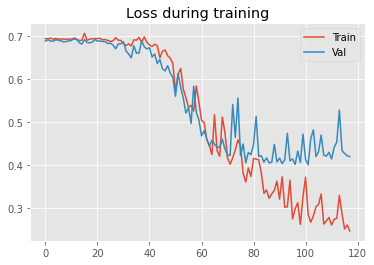

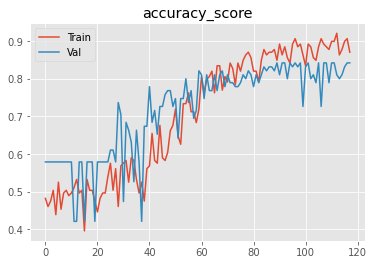

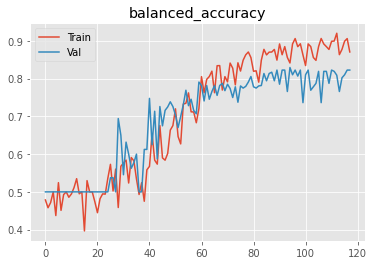

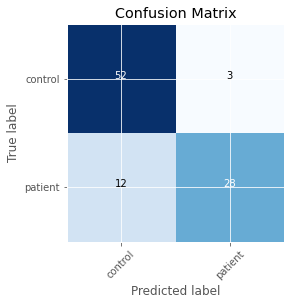

###### Starting inner fold 3
{'model': 'ModelB', 'batch_size': 12, 'patience': 16, 'lr': 5e-05}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.69513
Time elapsed: 0h:0m:2s
train accuracy_score: 45.32 %
train balanced_accuracy: 45.40 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.692569
[1,    10] loss: 0.69549
Time elapsed: 0h:0m:5s
train accuracy_score: 46.04 %
train balanced_accuracy: 45.80 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.689080
[2,    10] loss: 0.69734
Time elapsed: 0h:0m:9s
train accuracy_score: 41.73 %
train balanced_accuracy: 41.77 %
val accuracy_score: 42.11 %
val balanced_accuracy: 50.00 %
Val loss: 0.694758
[3,    10] loss: 0.69445
Time elapsed: 0h:0m:12s
train accuracy_score: 41.73 %
train balanced_accuracy: 41.66 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.692171
[4,    10] loss: 0.69376
Time elapsed: 0h:0m:16s
train accuracy_score: 50.36 %
train balanc

train balanced_accuracy: 56.68 %
val accuracy_score: 75.79 %
val balanced_accuracy: 71.25 %
Val loss: 0.679326
[43,    10] loss: 0.68250
Time elapsed: 0h:2m:30s
train accuracy_score: 66.19 %
train balanced_accuracy: 66.09 %
val accuracy_score: 72.63 %
val balanced_accuracy: 67.50 %
Val loss: 0.674627
[44,    10] loss: 0.68074
Time elapsed: 0h:2m:33s
train accuracy_score: 64.03 %
train balanced_accuracy: 63.90 %
val accuracy_score: 68.42 %
val balanced_accuracy: 62.50 %
Val loss: 0.667048
[45,    10] loss: 0.67967
Time elapsed: 0h:2m:37s
train accuracy_score: 58.99 %
train balanced_accuracy: 58.79 %
val accuracy_score: 74.74 %
val balanced_accuracy: 70.68 %
Val loss: 0.663086
[46,    10] loss: 0.68072
Time elapsed: 0h:2m:40s
train accuracy_score: 57.55 %
train balanced_accuracy: 57.60 %
val accuracy_score: 75.79 %
val balanced_accuracy: 71.93 %
Val loss: 0.659558
[47,    10] loss: 0.67406
Time elapsed: 0h:2m:44s
train accuracy_score: 57.55 %
train balanced_accuracy: 57.35 %
val accuracy

val accuracy_score: 80.00 %
val balanced_accuracy: 76.93 %
Val loss: 0.448019
[86,    10] loss: 0.43197
Time elapsed: 0h:4m:57s
train accuracy_score: 79.86 %
train balanced_accuracy: 79.77 %
val accuracy_score: 72.63 %
val balanced_accuracy: 73.64 %
Val loss: 0.482123
[87,    10] loss: 0.43249
Time elapsed: 0h:5m:1s
train accuracy_score: 77.70 %
train balanced_accuracy: 77.76 %
val accuracy_score: 81.05 %
val balanced_accuracy: 77.50 %
Val loss: 0.485472
[88,    10] loss: 0.45866
Time elapsed: 0h:5m:4s
train accuracy_score: 82.01 %
train balanced_accuracy: 81.96 %
val accuracy_score: 72.63 %
val balanced_accuracy: 73.30 %
Val loss: 0.477344
[89,    10] loss: 0.40495
Time elapsed: 0h:5m:7s
train accuracy_score: 84.89 %
train balanced_accuracy: 84.88 %
val accuracy_score: 82.11 %
val balanced_accuracy: 78.75 %
Val loss: 0.452041
[90,    10] loss: 0.33896
Time elapsed: 0h:5m:11s
train accuracy_score: 85.61 %
train balanced_accuracy: 85.60 %
val accuracy_score: 80.00 %
val balanced_accurac

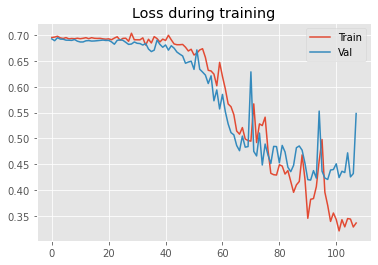

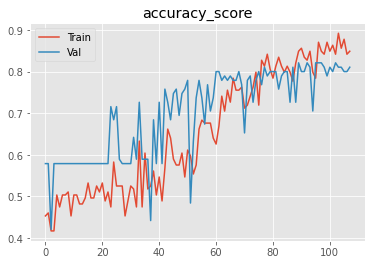

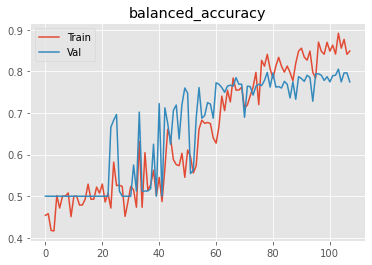

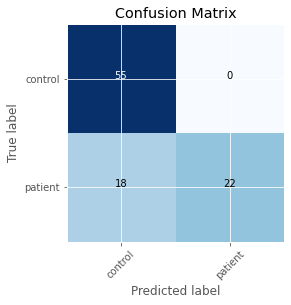

###### Starting inner fold 4
{'model': 'ModelB', 'batch_size': 12, 'patience': 12, 'lr': 5e-05}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.69520
Time elapsed: 0h:0m:2s
train accuracy_score: 47.48 %
train balanced_accuracy: 47.34 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.692019
[1,    10] loss: 0.69717
Time elapsed: 0h:0m:5s
train accuracy_score: 50.36 %
train balanced_accuracy: 50.06 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.689403
[2,    10] loss: 0.69406
Time elapsed: 0h:0m:9s
train accuracy_score: 47.48 %
train balanced_accuracy: 47.18 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.690204
[3,    10] loss: 0.69811
Time elapsed: 0h:0m:12s
train accuracy_score: 40.29 %
train balanced_accuracy: 40.29 %
val accuracy_score: 35.79 %
val balanced_accuracy: 38.75 %
Val loss: 0.693300
[4,    10] loss: 0.69324
Time elapsed: 0h:0m:16s
train accuracy_score: 51.08 %
train balanc

val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.678122
[43,    10] loss: 0.68386
Time elapsed: 0h:2m:29s
train accuracy_score: 54.68 %
train balanced_accuracy: 54.37 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.674747
[44,    10] loss: 0.68102
Time elapsed: 0h:2m:32s
train accuracy_score: 64.03 %
train balanced_accuracy: 64.02 %
val accuracy_score: 45.26 %
val balanced_accuracy: 52.73 %
Val loss: 0.687444
[45,    10] loss: 0.69110
Time elapsed: 0h:2m:35s
train accuracy_score: 51.08 %
train balanced_accuracy: 51.36 %
val accuracy_score: 71.58 %
val balanced_accuracy: 71.02 %
Val loss: 0.679430
[46,    10] loss: 0.68878
Time elapsed: 0h:2m:39s
train accuracy_score: 55.40 %
train balanced_accuracy: 55.14 %
val accuracy_score: 57.89 %
val balanced_accuracy: 50.00 %
Val loss: 0.665926
[47,    10] loss: 0.68842
Time elapsed: 0h:2m:42s
train accuracy_score: 60.43 %
train balanced_accuracy: 60.24 %
val accuracy_score: 77.89 %
val balanced_accu

val accuracy_score: 83.16 %
val balanced_accuracy: 80.68 %
Val loss: 0.421059
[86,    10] loss: 0.44324
Time elapsed: 0h:4m:55s
train accuracy_score: 79.14 %
train balanced_accuracy: 79.12 %
val accuracy_score: 76.84 %
val balanced_accuracy: 76.59 %
Val loss: 0.462131
[87,    10] loss: 0.43995
Time elapsed: 0h:4m:58s
train accuracy_score: 79.14 %
train balanced_accuracy: 79.17 %
val accuracy_score: 81.05 %
val balanced_accuracy: 77.50 %
Val loss: 0.452078
[88,    10] loss: 0.46317
Time elapsed: 0h:5m:2s
train accuracy_score: 82.73 %
train balanced_accuracy: 82.72 %
val accuracy_score: 83.16 %
val balanced_accuracy: 80.68 %
Val loss: 0.433081
[89,    10] loss: 0.43048
Time elapsed: 0h:5m:5s
train accuracy_score: 83.45 %
train balanced_accuracy: 83.44 %
val accuracy_score: 78.95 %
val balanced_accuracy: 78.41 %
Val loss: 0.451554
[90,    10] loss: 0.42131
Time elapsed: 0h:5m:9s
train accuracy_score: 82.01 %
train balanced_accuracy: 82.02 %
val accuracy_score: 83.16 %
val balanced_accurac

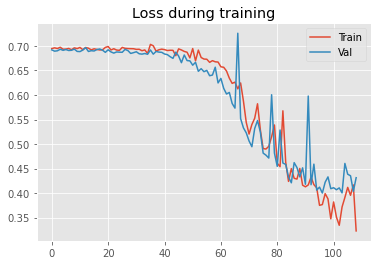

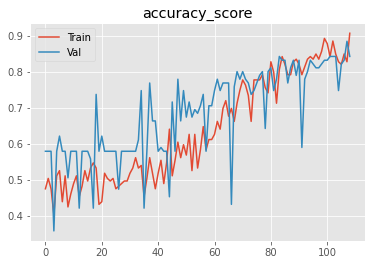

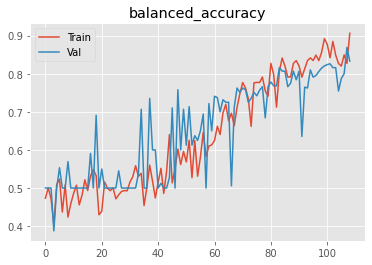

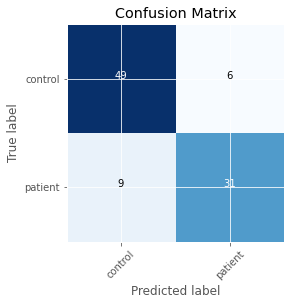

Finished outer fold.
{'final_acc': 0.8329545454545455, 'best_acc': 0.8693181818181819, 'final_iter': 109, 'best_iter': 108, 'params': {'model': 'ModelB', 'batch_size': 12, 'patience': 12, 'lr': 5e-05}, 'inner_fold_idx': 4}
###### Starting outer fold 2
# of patients 122, # of healthy controls 117
138
101
###### Starting inner fold 0
{'model': 'ModelA', 'batch_size': 12, 'patience': 12, 'lr': 0.0001}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69787
Time elapsed: 0h:0m:1s
train accuracy_score: 43.48 %
train balanced_accuracy: 46.60 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.694015
[1,    10] loss: 0.69271
Time elapsed: 0h:0m:4s
train accuracy_score: 53.62 %
train balanced_accuracy: 50.32 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.696851
[2,    10] loss: 0.69679
Time elapsed: 0h:0m:6s
train accuracy_score: 55.07 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50

val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.698972
[41,    10] loss: 0.69038
Time elapsed: 0h:1m:48s
train accuracy_score: 55.07 %
train balanced_accuracy: 51.78 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.696709
[42,    10] loss: 0.68179
Time elapsed: 0h:1m:50s
train accuracy_score: 58.70 %
train balanced_accuracy: 56.56 %
val accuracy_score: 49.50 %
val balanced_accuracy: 53.64 %
Val loss: 0.693283
[43,    10] loss: 0.70287
Time elapsed: 0h:1m:53s
train accuracy_score: 51.45 %
train balanced_accuracy: 48.05 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.703406
[44,    10] loss: 0.67894
Time elapsed: 0h:1m:56s
train accuracy_score: 57.25 %
train balanced_accuracy: 53.31 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.697591
[45,    10] loss: 0.68341
Time elapsed: 0h:1m:58s
train accuracy_score: 59.42 %
train balanced_accuracy: 56.62 %
val accuracy_score: 45.54 %
val balanced_accu

val accuracy_score: 62.38 %
val balanced_accuracy: 59.76 %
Val loss: 0.645158
[84,    10] loss: 0.65723
Time elapsed: 0h:3m:39s
train accuracy_score: 58.70 %
train balanced_accuracy: 56.71 %
val accuracy_score: 56.44 %
val balanced_accuracy: 60.00 %
Val loss: 0.685440
[85,    10] loss: 0.59510
Time elapsed: 0h:3m:42s
train accuracy_score: 70.29 %
train balanced_accuracy: 67.68 %
val accuracy_score: 58.42 %
val balanced_accuracy: 58.97 %
Val loss: 0.645045
[86,    10] loss: 0.61666
Time elapsed: 0h:3m:44s
train accuracy_score: 68.84 %
train balanced_accuracy: 67.85 %
val accuracy_score: 54.46 %
val balanced_accuracy: 54.62 %
Val loss: 0.642540
[87,    10] loss: 0.59581
Time elapsed: 0h:3m:47s
train accuracy_score: 60.87 %
train balanced_accuracy: 61.80 %
val accuracy_score: 57.43 %
val balanced_accuracy: 58.77 %
Val loss: 0.668110
[88,    10] loss: 0.64253
Time elapsed: 0h:3m:50s
train accuracy_score: 60.14 %
train balanced_accuracy: 59.06 %
val accuracy_score: 54.46 %
val balanced_accu

val accuracy_score: 66.34 %
val balanced_accuracy: 67.67 %
Val loss: 0.604780
[127,    10] loss: 0.43508
Time elapsed: 0h:5m:30s
train accuracy_score: 84.06 %
train balanced_accuracy: 83.60 %
val accuracy_score: 65.35 %
val balanced_accuracy: 66.58 %
Val loss: 0.608981
[128,    10] loss: 0.48526
Time elapsed: 0h:5m:32s
train accuracy_score: 82.61 %
train balanced_accuracy: 82.43 %
val accuracy_score: 65.35 %
val balanced_accuracy: 66.94 %
Val loss: 0.625244
[129,    10] loss: 0.42542
Time elapsed: 0h:5m:35s
train accuracy_score: 81.16 %
train balanced_accuracy: 80.81 %
val accuracy_score: 65.35 %
val balanced_accuracy: 65.16 %
Val loss: 0.556371
[130,    10] loss: 0.39781
Time elapsed: 0h:5m:37s
train accuracy_score: 83.33 %
train balanced_accuracy: 82.64 %
val accuracy_score: 66.34 %
val balanced_accuracy: 65.53 %
Val loss: 0.543098
[131,    10] loss: 0.41123
Time elapsed: 0h:5m:40s
train accuracy_score: 82.61 %
train balanced_accuracy: 82.72 %
val accuracy_score: 65.35 %
val balanced

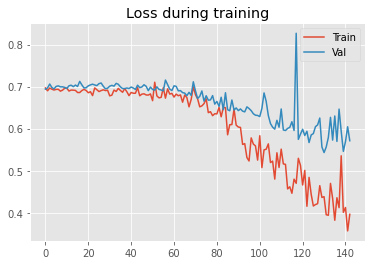

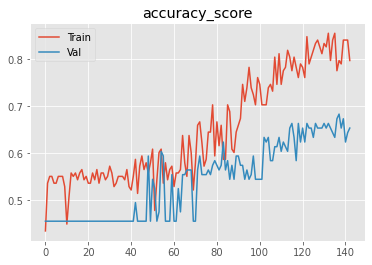

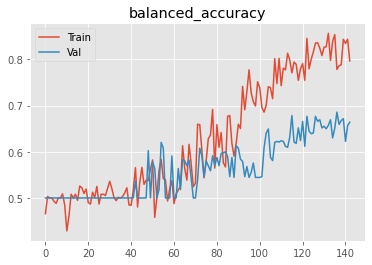

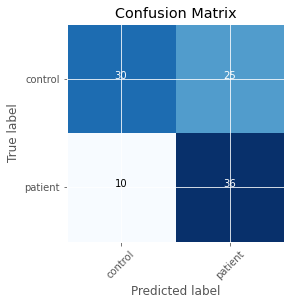

###### Starting inner fold 1
{'model': 'ModelA', 'batch_size': 6, 'patience': 16, 'lr': 0.0001}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69391
[0,    20] loss: 0.69674
Time elapsed: 0h:0m:1s
train accuracy_score: 44.93 %
train balanced_accuracy: 44.21 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.698052
[1,    10] loss: 0.69017
[1,    20] loss: 0.67361
Time elapsed: 0h:0m:3s
train accuracy_score: 55.80 %
train balanced_accuracy: 50.96 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.718420
[2,    10] loss: 0.67778
[2,    20] loss: 0.69170
Time elapsed: 0h:0m:6s
train accuracy_score: 53.62 %
train balanced_accuracy: 49.28 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.698668
[3,    10] loss: 0.69102
[3,    20] loss: 0.70083
Time elapsed: 0h:0m:9s
train accuracy_score: 52.90 %
train balanced_accuracy: 51.00 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0

val accuracy_score: 54.46 %
val balanced_accuracy: 51.78 %
Val loss: 0.684388
[38,    10] loss: 0.61837
[38,    20] loss: 0.59841
Time elapsed: 0h:1m:38s
train accuracy_score: 66.67 %
train balanced_accuracy: 66.91 %
val accuracy_score: 60.40 %
val balanced_accuracy: 62.21 %
Val loss: 0.690923
[39,    10] loss: 0.68401
[39,    20] loss: 0.64058
Time elapsed: 0h:1m:41s
train accuracy_score: 63.77 %
train balanced_accuracy: 61.01 %
val accuracy_score: 54.46 %
val balanced_accuracy: 51.60 %
Val loss: 0.674316
[40,    10] loss: 0.65930
[40,    20] loss: 0.62557
Time elapsed: 0h:1m:43s
train accuracy_score: 65.22 %
train balanced_accuracy: 65.00 %
val accuracy_score: 58.42 %
val balanced_accuracy: 57.37 %
Val loss: 0.674413
[41,    10] loss: 0.60342
[41,    20] loss: 0.66355
Time elapsed: 0h:1m:46s
train accuracy_score: 65.22 %
train balanced_accuracy: 63.37 %
val accuracy_score: 58.42 %
val balanced_accuracy: 56.84 %
Val loss: 0.664479
[42,    10] loss: 0.64157
[42,    20] loss: 0.63929
Ti

val accuracy_score: 66.34 %
val balanced_accuracy: 65.53 %
Val loss: 0.528709
[76,    10] loss: 0.52956
[76,    20] loss: 0.48724
Time elapsed: 0h:3m:17s
train accuracy_score: 76.09 %
train balanced_accuracy: 75.62 %
val accuracy_score: 71.29 %
val balanced_accuracy: 69.55 %
Val loss: 0.519380
[77,    10] loss: 0.46942
[77,    20] loss: 0.40430
Time elapsed: 0h:3m:20s
train accuracy_score: 78.99 %
train balanced_accuracy: 78.99 %
val accuracy_score: 65.35 %
val balanced_accuracy: 65.87 %
Val loss: 0.579585
[78,    10] loss: 0.40888
[78,    20] loss: 0.39469
Time elapsed: 0h:3m:23s
train accuracy_score: 82.61 %
train balanced_accuracy: 82.58 %
val accuracy_score: 68.32 %
val balanced_accuracy: 66.82 %
Val loss: 0.540907
[79,    10] loss: 0.35964
[79,    20] loss: 0.54391
Time elapsed: 0h:3m:25s
train accuracy_score: 83.33 %
train balanced_accuracy: 83.09 %
val accuracy_score: 66.34 %
val balanced_accuracy: 65.36 %
Val loss: 0.518037
[80,    10] loss: 0.42955
[80,    20] loss: 0.45868
Ti

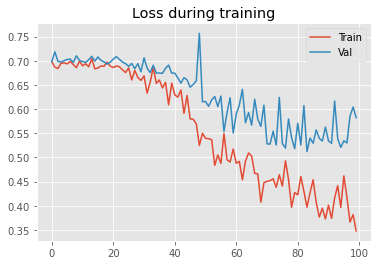

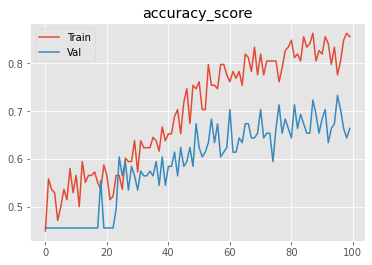

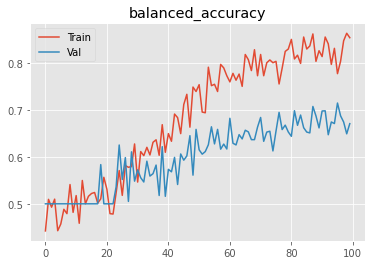

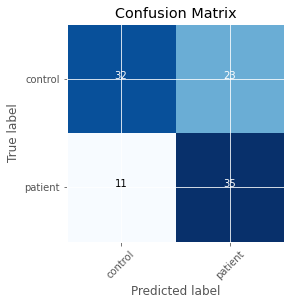

###### Starting inner fold 2
{'model': 'ModelB', 'batch_size': 6, 'patience': 16, 'lr': 0.0001}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.69570
[0,    20] loss: 0.69592
Time elapsed: 0h:0m:2s
train accuracy_score: 51.45 %
train balanced_accuracy: 47.90 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.704820
[1,    10] loss: 0.69543
[1,    20] loss: 0.67509
Time elapsed: 0h:0m:5s
train accuracy_score: 57.97 %
train balanced_accuracy: 55.45 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.741819
[2,    10] loss: 0.70926
[2,    20] loss: 0.69208
Time elapsed: 0h:0m:9s
train accuracy_score: 52.17 %
train balanced_accuracy: 47.67 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.695881
[3,    10] loss: 0.69932
[3,    20] loss: 0.68960
Time elapsed: 0h:0m:12s
train accuracy_score: 53.62 %
train balanced_accuracy: 49.13 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 

Time elapsed: 0h:2m:8s
train accuracy_score: 71.74 %
train balanced_accuracy: 70.63 %
val accuracy_score: 57.43 %
val balanced_accuracy: 57.00 %
Val loss: 0.617311
[38,    10] loss: 0.49152
[38,    20] loss: 0.57294
Time elapsed: 0h:2m:12s
train accuracy_score: 72.46 %
train balanced_accuracy: 71.88 %
val accuracy_score: 57.43 %
val balanced_accuracy: 59.49 %
Val loss: 0.677670
[39,    10] loss: 0.50293
[39,    20] loss: 0.53392
Time elapsed: 0h:2m:15s
train accuracy_score: 74.64 %
train balanced_accuracy: 74.15 %
val accuracy_score: 57.43 %
val balanced_accuracy: 59.49 %
Val loss: 0.674239
[40,    10] loss: 0.47433
[40,    20] loss: 0.61029
Time elapsed: 0h:2m:18s
train accuracy_score: 73.91 %
train balanced_accuracy: 73.94 %
val accuracy_score: 52.48 %
val balanced_accuracy: 56.01 %
Val loss: 0.885093
[41,    10] loss: 0.55853
[41,    20] loss: 0.59678
Time elapsed: 0h:2m:22s
train accuracy_score: 71.74 %
train balanced_accuracy: 70.33 %
val accuracy_score: 62.38 %
val balanced_accur

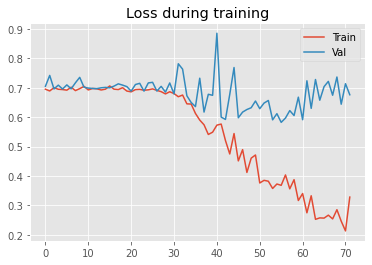

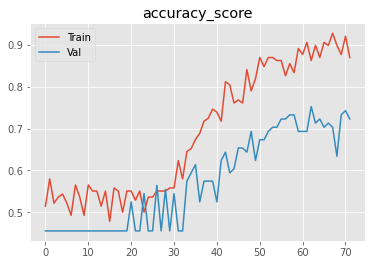

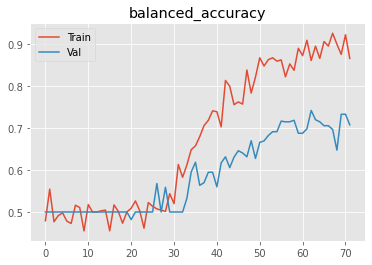

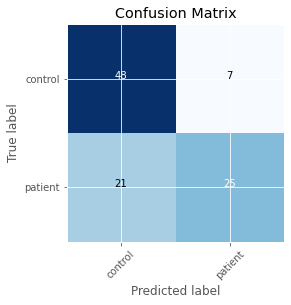

###### Starting inner fold 3
{'model': 'ModelB', 'batch_size': 4, 'patience': 12, 'lr': 5e-05}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.68837
[0,    20] loss: 0.71244
[0,    30] loss: 0.69858
Time elapsed: 0h:0m:2s
train accuracy_score: 52.90 %
train balanced_accuracy: 48.62 %
val accuracy_score: 51.49 %
val balanced_accuracy: 48.87 %
Val loss: 0.692995
[1,    10] loss: 0.69889
[1,    20] loss: 0.69639
[1,    30] loss: 0.68973
Time elapsed: 0h:0m:5s
train accuracy_score: 52.17 %
train balanced_accuracy: 49.00 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.697744
[2,    10] loss: 0.69082
[2,    20] loss: 0.68376
[2,    30] loss: 0.70661
Time elapsed: 0h:0m:9s
train accuracy_score: 55.07 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.698137
[3,    10] loss: 0.67032
[3,    20] loss: 0.69103
[3,    30] loss: 0.67451
Time elapsed: 0h:0m:12s
train accuracy_score: 54.35 %
tra

Time elapsed: 0h:1m:56s
train accuracy_score: 54.35 %
train balanced_accuracy: 54.10 %
val accuracy_score: 52.48 %
val balanced_accuracy: 56.01 %
Val loss: 0.687359
[34,    10] loss: 0.67966
[34,    20] loss: 0.66740
[34,    30] loss: 0.67168
Time elapsed: 0h:1m:59s
train accuracy_score: 59.42 %
train balanced_accuracy: 57.66 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.703672
[35,    10] loss: 0.71353
[35,    20] loss: 0.66987
[35,    30] loss: 0.67243
Time elapsed: 0h:2m:3s
train accuracy_score: 52.90 %
train balanced_accuracy: 51.89 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.712666
[36,    10] loss: 0.70508
[36,    20] loss: 0.66467
[36,    30] loss: 0.66337
Time elapsed: 0h:2m:6s
train accuracy_score: 59.42 %
train balanced_accuracy: 56.92 %
val accuracy_score: 53.47 %
val balanced_accuracy: 56.92 %
Val loss: 0.687580
[37,    10] loss: 0.69062
[37,    20] loss: 0.60074
[37,    30] loss: 0.78267
Time elapsed: 0h:2m:10s
train 

[67,    20] loss: 0.44003
[67,    30] loss: 0.41884
Time elapsed: 0h:3m:52s
train accuracy_score: 81.88 %
train balanced_accuracy: 82.22 %
val accuracy_score: 67.33 %
val balanced_accuracy: 67.51 %
Val loss: 0.591898
[68,    10] loss: 0.37852
[68,    20] loss: 0.50007
[68,    30] loss: 0.39894
Time elapsed: 0h:3m:56s
train accuracy_score: 80.43 %
train balanced_accuracy: 80.31 %
val accuracy_score: 61.39 %
val balanced_accuracy: 62.94 %
Val loss: 0.706266
[69,    10] loss: 0.38691
[69,    20] loss: 0.32974
[69,    30] loss: 0.45469
Time elapsed: 0h:3m:59s
train accuracy_score: 82.61 %
train balanced_accuracy: 82.13 %
val accuracy_score: 61.39 %
val balanced_accuracy: 62.23 %
Val loss: 0.632409
[70,    10] loss: 0.33271
[70,    20] loss: 0.28899
[70,    30] loss: 0.46045
Time elapsed: 0h:4m:3s
train accuracy_score: 86.23 %
train balanced_accuracy: 86.31 %
val accuracy_score: 58.42 %
val balanced_accuracy: 61.28 %
Val loss: 0.804806
[71,    10] loss: 0.31842
[71,    20] loss: 0.30135
[71

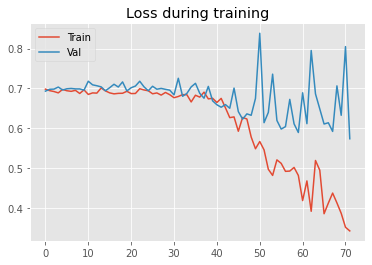

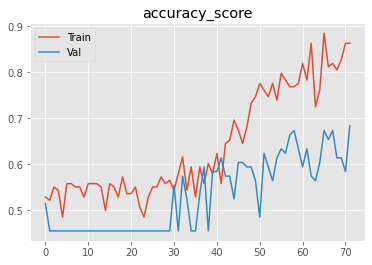

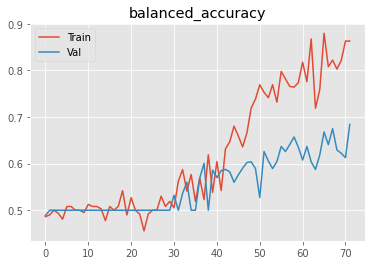

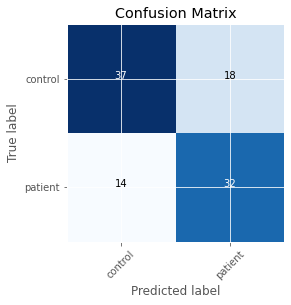

###### Starting inner fold 4
{'model': 'ModelB', 'batch_size': 4, 'patience': 12, 'lr': 5e-05}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.68879
[0,    20] loss: 0.67345
[0,    30] loss: 0.70111
Time elapsed: 0h:0m:2s
train accuracy_score: 55.07 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.704234
[1,    10] loss: 0.69760
[1,    20] loss: 0.69558
[1,    30] loss: 0.68087
Time elapsed: 0h:0m:5s
train accuracy_score: 52.17 %
train balanced_accuracy: 47.96 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.702645
[2,    10] loss: 0.68248
[2,    20] loss: 0.71232
[2,    30] loss: 0.68307
Time elapsed: 0h:0m:8s
train accuracy_score: 55.07 %
train balanced_accuracy: 50.00 %
val accuracy_score: 45.54 %
val balanced_accuracy: 50.00 %
Val loss: 0.700578
[3,    10] loss: 0.69979
[3,    20] loss: 0.68213
[3,    30] loss: 0.68861
Time elapsed: 0h:0m:12s
train accuracy_score: 55.07 %
tra

Time elapsed: 0h:1m:56s
train accuracy_score: 58.70 %
train balanced_accuracy: 57.30 %
val accuracy_score: 55.45 %
val balanced_accuracy: 58.38 %
Val loss: 0.674841
[34,    10] loss: 0.64178
[34,    20] loss: 0.62219
[34,    30] loss: 0.61709
Time elapsed: 0h:1m:59s
train accuracy_score: 71.01 %
train balanced_accuracy: 68.78 %
val accuracy_score: 64.36 %
val balanced_accuracy: 61.76 %
Val loss: 0.636441
[35,    10] loss: 0.59309
[35,    20] loss: 0.62510
[35,    30] loss: 0.63275
Time elapsed: 0h:2m:3s
train accuracy_score: 66.67 %
train balanced_accuracy: 66.62 %
val accuracy_score: 60.40 %
val balanced_accuracy: 60.08 %
Val loss: 0.634149
[36,    10] loss: 0.58966
[36,    20] loss: 0.72414
[36,    30] loss: 0.58985
Time elapsed: 0h:2m:6s
train accuracy_score: 66.67 %
train balanced_accuracy: 64.69 %
val accuracy_score: 56.44 %
val balanced_accuracy: 59.64 %
Val loss: 0.669874
[37,    10] loss: 0.58415
[37,    20] loss: 0.57475
[37,    30] loss: 0.52668
Time elapsed: 0h:2m:10s
train 

[67,    20] loss: 0.51628
[67,    30] loss: 0.34333
Time elapsed: 0h:3m:54s
train accuracy_score: 83.33 %
train balanced_accuracy: 82.79 %
val accuracy_score: 57.43 %
val balanced_accuracy: 60.55 %
Val loss: 0.710692
[68,    10] loss: 0.22679
[68,    20] loss: 0.41406
[68,    30] loss: 0.38238
Time elapsed: 0h:3m:58s
train accuracy_score: 86.23 %
train balanced_accuracy: 86.16 %
val accuracy_score: 75.25 %
val balanced_accuracy: 74.07 %
Val loss: 0.509837
[69,    10] loss: 0.40612
[69,    20] loss: 0.28855
[69,    30] loss: 0.30697
Time elapsed: 0h:4m:1s
train accuracy_score: 86.23 %
train balanced_accuracy: 86.61 %
val accuracy_score: 63.37 %
val balanced_accuracy: 63.70 %
Val loss: 0.519614
[70,    10] loss: 0.37516
[70,    20] loss: 0.32524
[70,    30] loss: 0.34703
Time elapsed: 0h:4m:5s
train accuracy_score: 86.96 %
train balanced_accuracy: 87.12 %
val accuracy_score: 58.42 %
val balanced_accuracy: 61.28 %
Val loss: 0.805091
[71,    10] loss: 0.49964
[71,    20] loss: 0.23233
[71,

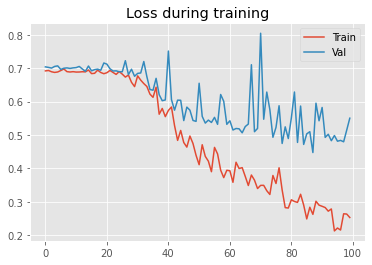

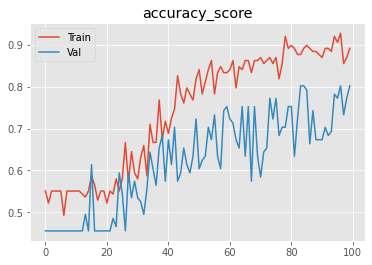

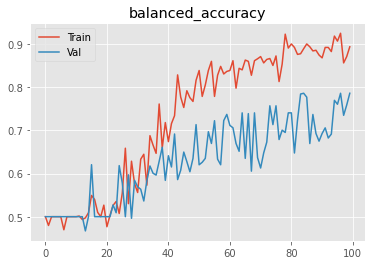

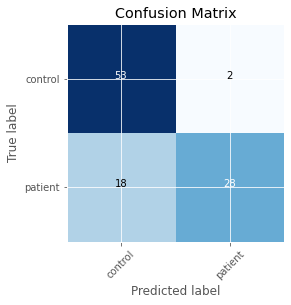

Finished outer fold.
{'final_acc': 0.7861660079051385, 'best_acc': 0.7861660079051385, 'final_iter': 100, 'best_iter': 100, 'params': {'model': 'ModelB', 'batch_size': 4, 'patience': 12, 'lr': 5e-05}, 'inner_fold_idx': 4}
###### Starting outer fold 3
# of patients 98, # of healthy controls 141
141
98
###### Starting inner fold 0
{'model': 'ModelA', 'batch_size': 12, 'patience': 12, 'lr': 5e-05}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69106
Time elapsed: 0h:0m:1s
train accuracy_score: 53.90 %
train balanced_accuracy: 48.64 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.684244
[1,    10] loss: 0.68591
Time elapsed: 0h:0m:3s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.679711
[2,    10] loss: 0.69034
Time elapsed: 0h:0m:6s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 

[41,    10] loss: 0.67987
Time elapsed: 0h:1m:46s
train accuracy_score: 56.74 %
train balanced_accuracy: 49.38 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.654822
[42,    10] loss: 0.67623
Time elapsed: 0h:1m:48s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.656969
[43,    10] loss: 0.68111
Time elapsed: 0h:1m:51s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.656754
[44,    10] loss: 0.67626
Time elapsed: 0h:1m:53s
train accuracy_score: 58.16 %
train balanced_accuracy: 50.83 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.654792
[45,    10] loss: 0.66111
Time elapsed: 0h:1m:55s
train accuracy_score: 58.16 %
train balanced_accuracy: 51.05 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.649858
[46,    10] loss: 0.66870
Time elapsed: 0h:1m

[84,    10] loss: 0.62642
Time elapsed: 0h:3m:36s
train accuracy_score: 63.83 %
train balanced_accuracy: 61.17 %
val accuracy_score: 76.53 %
val balanced_accuracy: 72.15 %
Val loss: 0.575493
[85,    10] loss: 0.64174
Time elapsed: 0h:3m:39s
train accuracy_score: 67.38 %
train balanced_accuracy: 66.42 %
val accuracy_score: 75.51 %
val balanced_accuracy: 72.28 %
Val loss: 0.589705
[86,    10] loss: 0.60370
Time elapsed: 0h:3m:41s
train accuracy_score: 73.76 %
train balanced_accuracy: 71.11 %
val accuracy_score: 73.47 %
val balanced_accuracy: 67.24 %
Val loss: 0.579537
[87,    10] loss: 0.59445
Time elapsed: 0h:3m:44s
train accuracy_score: 68.79 %
train balanced_accuracy: 65.49 %
val accuracy_score: 76.53 %
val balanced_accuracy: 71.18 %
Val loss: 0.574112
[88,    10] loss: 0.59915
Time elapsed: 0h:3m:46s
train accuracy_score: 67.38 %
train balanced_accuracy: 63.83 %
val accuracy_score: 78.57 %
val balanced_accuracy: 74.78 %
Val loss: 0.572921
[89,    10] loss: 0.61292
Time elapsed: 0h:3m

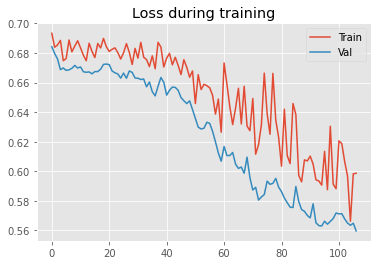

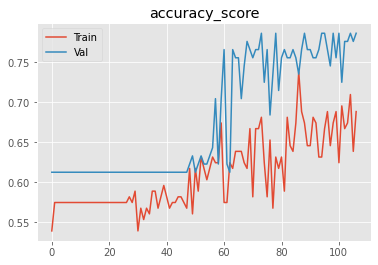

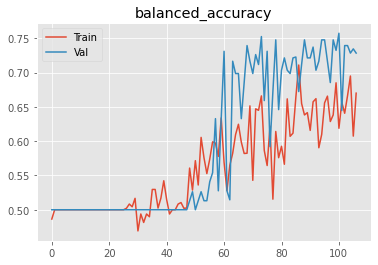

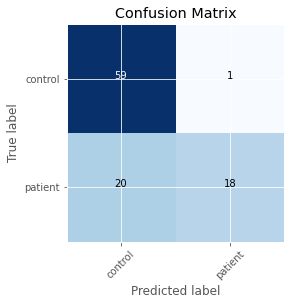

###### Starting inner fold 1
{'model': 'ModelA', 'batch_size': 4, 'patience': 12, 'lr': 0.0001}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69325
[0,    20] loss: 0.69064
[0,    30] loss: 0.70491
Time elapsed: 0h:0m:1s
train accuracy_score: 56.03 %
train balanced_accuracy: 49.41 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.668998
[1,    10] loss: 0.72171
[1,    20] loss: 0.67732
[1,    30] loss: 0.69134
Time elapsed: 0h:0m:3s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.668717
[2,    10] loss: 0.61798
[2,    20] loss: 0.74231
[2,    30] loss: 0.71080
Time elapsed: 0h:0m:6s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.678875
[3,    10] loss: 0.69343
[3,    20] loss: 0.68186
[3,    30] loss: 0.68583
Time elapsed: 0h:0m:8s
train accuracy_score: 57.45 %
tra

Time elapsed: 0h:1m:25s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.665513
[34,    10] loss: 0.68293
[34,    20] loss: 0.68841
[34,    30] loss: 0.67495
Time elapsed: 0h:1m:28s
train accuracy_score: 58.16 %
train balanced_accuracy: 51.27 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.657178
[35,    10] loss: 0.65419
[35,    20] loss: 0.63553
[35,    30] loss: 0.67519
Time elapsed: 0h:1m:30s
train accuracy_score: 58.87 %
train balanced_accuracy: 51.88 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.648571
[36,    10] loss: 0.62685
[36,    20] loss: 0.67425
[36,    30] loss: 0.68446
Time elapsed: 0h:1m:33s
train accuracy_score: 56.74 %
train balanced_accuracy: 51.54 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.650904
[37,    10] loss: 0.66819
[37,    20] loss: 0.68398
[37,    30] loss: 0.71530
Time elapsed: 0h:1m:36s
trai

[67,    20] loss: 0.42957
[67,    30] loss: 0.60366
Time elapsed: 0h:2m:54s
train accuracy_score: 74.47 %
train balanced_accuracy: 71.94 %
val accuracy_score: 77.55 %
val balanced_accuracy: 75.88 %
Val loss: 0.502277
[68,    10] loss: 0.42992
[68,    20] loss: 0.52272
[68,    30] loss: 0.42757
Time elapsed: 0h:2m:56s
train accuracy_score: 80.85 %
train balanced_accuracy: 79.66 %
val accuracy_score: 68.37 %
val balanced_accuracy: 71.27 %
Val loss: 0.561244
[69,    10] loss: 0.48433
[69,    20] loss: 0.50234
[69,    30] loss: 0.57263
Time elapsed: 0h:2m:59s
train accuracy_score: 72.34 %
train balanced_accuracy: 71.17 %
val accuracy_score: 71.43 %
val balanced_accuracy: 69.91 %
Val loss: 0.511112
[70,    10] loss: 0.47182
[70,    20] loss: 0.48179
[70,    30] loss: 0.54855
Time elapsed: 0h:3m:1s
train accuracy_score: 77.30 %
train balanced_accuracy: 76.14 %
val accuracy_score: 74.49 %
val balanced_accuracy: 67.59 %
Val loss: 0.537299
[71,    10] loss: 0.59484
[71,    20] loss: 0.50023
[71

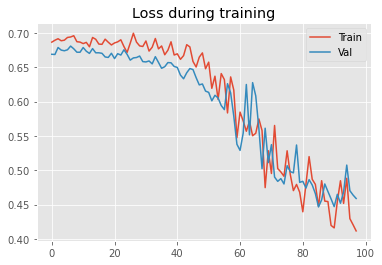

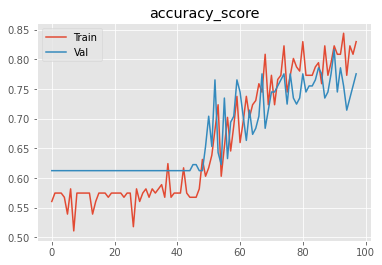

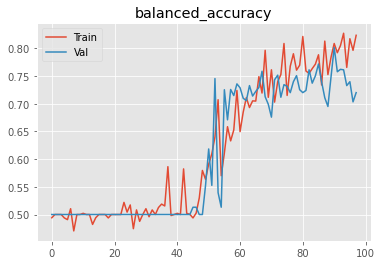

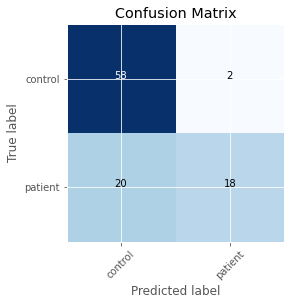

###### Starting inner fold 2
{'model': 'ModelB', 'batch_size': 6, 'patience': 16, 'lr': 5e-05}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.68946
[0,    20] loss: 0.69116
Time elapsed: 0h:0m:2s
train accuracy_score: 51.06 %
train balanced_accuracy: 45.09 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.670304
[1,    10] loss: 0.67759
[1,    20] loss: 0.69962
Time elapsed: 0h:0m:5s
train accuracy_score: 56.74 %
train balanced_accuracy: 49.38 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.673268
[2,    10] loss: 0.69127
[2,    20] loss: 0.67652
Time elapsed: 0h:0m:9s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.671034
[3,    10] loss: 0.68348
[3,    20] loss: 0.68774
Time elapsed: 0h:0m:12s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0

Time elapsed: 0h:2m:7s
train accuracy_score: 53.90 %
train balanced_accuracy: 52.10 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.660142
[38,    10] loss: 0.70347
[38,    20] loss: 0.65897
Time elapsed: 0h:2m:10s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.654614
[39,    10] loss: 0.66921
[39,    20] loss: 0.66318
Time elapsed: 0h:2m:14s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.652781
[40,    10] loss: 0.67950
[40,    20] loss: 0.64724
Time elapsed: 0h:2m:17s
train accuracy_score: 58.87 %
train balanced_accuracy: 52.10 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.642329
[41,    10] loss: 0.64557
[41,    20] loss: 0.65128
Time elapsed: 0h:2m:21s
train accuracy_score: 60.28 %
train balanced_accuracy: 53.33 %
val accuracy_score: 62.24 %
val balanced_accur

[75,    20] loss: 0.50526
Time elapsed: 0h:4m:16s
train accuracy_score: 80.14 %
train balanced_accuracy: 79.26 %
val accuracy_score: 76.53 %
val balanced_accuracy: 72.63 %
Val loss: 0.481597
[76,    10] loss: 0.43906
[76,    20] loss: 0.36751
Time elapsed: 0h:4m:20s
train accuracy_score: 85.11 %
train balanced_accuracy: 84.44 %
val accuracy_score: 74.49 %
val balanced_accuracy: 68.07 %
Val loss: 0.551949
[77,    10] loss: 0.37741
[77,    20] loss: 0.41607
Time elapsed: 0h:4m:23s
train accuracy_score: 82.27 %
train balanced_accuracy: 80.46 %
val accuracy_score: 71.43 %
val balanced_accuracy: 75.22 %
Val loss: 0.614326
[78,    10] loss: 0.40255
[78,    20] loss: 0.52017
Time elapsed: 0h:4m:26s
train accuracy_score: 82.98 %
train balanced_accuracy: 81.51 %
val accuracy_score: 62.24 %
val balanced_accuracy: 67.72 %
Val loss: 0.671928
[79,    10] loss: 0.70109
[79,    20] loss: 0.52276
Time elapsed: 0h:4m:30s
train accuracy_score: 70.92 %
train balanced_accuracy: 72.10 %
val accuracy_score:

[113,    10] loss: 0.20837
[113,    20] loss: 0.20144
Time elapsed: 0h:6m:27s
train accuracy_score: 91.49 %
train balanced_accuracy: 90.86 %
val accuracy_score: 72.45 %
val balanced_accuracy: 76.05 %
Val loss: 0.572061
[114,    10] loss: 0.33801
[114,    20] loss: 0.26970
Time elapsed: 0h:6m:31s
train accuracy_score: 87.23 %
train balanced_accuracy: 86.51 %
val accuracy_score: 71.43 %
val balanced_accuracy: 76.18 %
Val loss: 0.630655
[115,    10] loss: 0.28722
[115,    20] loss: 0.34716
Time elapsed: 0h:6m:34s
train accuracy_score: 88.65 %
train balanced_accuracy: 88.83 %
val accuracy_score: 66.33 %
val balanced_accuracy: 72.50 %
Val loss: 0.783282
[116,    10] loss: 0.33459
[116,    20] loss: 0.29567
Time elapsed: 0h:6m:38s
train accuracy_score: 86.52 %
train balanced_accuracy: 85.90 %
val accuracy_score: 67.35 %
val balanced_accuracy: 72.85 %
Val loss: 0.665425
[117,    10] loss: 0.35044
[117,    20] loss: 0.24147
Time elapsed: 0h:6m:41s
train accuracy_score: 88.65 %
train balanced_a

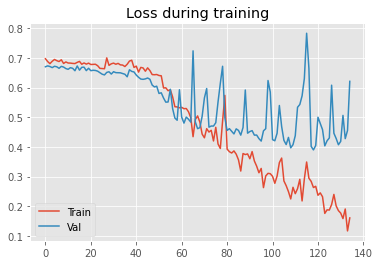

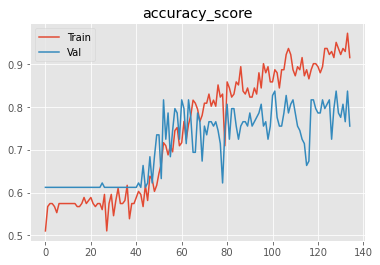

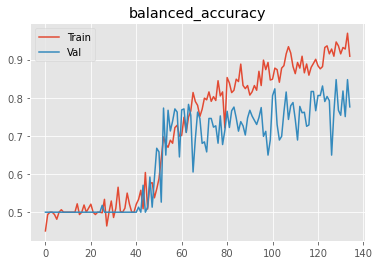

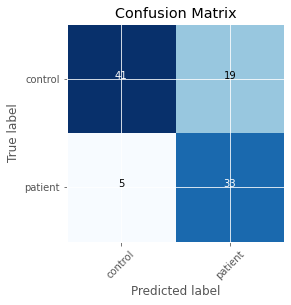

###### Starting inner fold 3
{'model': 'ModelB', 'batch_size': 6, 'patience': 16, 'lr': 0.0001}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.69774
[0,    20] loss: 0.68427
Time elapsed: 0h:0m:2s
train accuracy_score: 51.77 %
train balanced_accuracy: 45.93 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.670971
[1,    10] loss: 0.67017
[1,    20] loss: 0.73874
Time elapsed: 0h:0m:5s
train accuracy_score: 56.74 %
train balanced_accuracy: 50.68 %
val accuracy_score: 61.22 %
val balanced_accuracy: 51.45 %
Val loss: 0.684852
[2,    10] loss: 0.68762
[2,    20] loss: 0.68385
Time elapsed: 0h:0m:9s
train accuracy_score: 57.45 %
train balanced_accuracy: 51.08 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.661232
[3,    10] loss: 0.69082
[3,    20] loss: 0.69365
Time elapsed: 0h:0m:12s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.43 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 

Time elapsed: 0h:2m:8s
train accuracy_score: 75.18 %
train balanced_accuracy: 73.64 %
val accuracy_score: 80.61 %
val balanced_accuracy: 78.38 %
Val loss: 0.473044
[38,    10] loss: 0.51226
[38,    20] loss: 0.59660
Time elapsed: 0h:2m:12s
train accuracy_score: 69.50 %
train balanced_accuracy: 68.49 %
val accuracy_score: 79.59 %
val balanced_accuracy: 75.61 %
Val loss: 0.478189
[39,    10] loss: 0.46031
[39,    20] loss: 0.67911
Time elapsed: 0h:2m:15s
train accuracy_score: 76.60 %
train balanced_accuracy: 75.74 %
val accuracy_score: 82.65 %
val balanced_accuracy: 79.56 %
Val loss: 0.474486
[40,    10] loss: 0.51990
[40,    20] loss: 0.50414
Time elapsed: 0h:2m:19s
train accuracy_score: 75.89 %
train balanced_accuracy: 74.91 %
val accuracy_score: 71.43 %
val balanced_accuracy: 74.25 %
Val loss: 0.525492
[41,    10] loss: 0.60944
[41,    20] loss: 0.51306
Time elapsed: 0h:2m:22s
train accuracy_score: 76.60 %
train balanced_accuracy: 75.31 %
val accuracy_score: 77.55 %
val balanced_accur

[75,    20] loss: 0.22245
Time elapsed: 0h:4m:20s
train accuracy_score: 89.36 %
train balanced_accuracy: 89.44 %
val accuracy_score: 76.53 %
val balanced_accuracy: 69.74 %
Val loss: 0.609115
[76,    10] loss: 0.13550
[76,    20] loss: 0.22409
Time elapsed: 0h:4m:23s
train accuracy_score: 91.49 %
train balanced_accuracy: 91.30 %
val accuracy_score: 83.67 %
val balanced_accuracy: 80.39 %
Val loss: 0.409528
[77,    10] loss: 0.19784
[77,    20] loss: 0.20636
Time elapsed: 0h:4m:27s
train accuracy_score: 92.91 %
train balanced_accuracy: 92.75 %
val accuracy_score: 83.67 %
val balanced_accuracy: 80.88 %
Val loss: 0.419449
[78,    10] loss: 0.16337
[78,    20] loss: 0.20605
Time elapsed: 0h:4m:30s
train accuracy_score: 92.20 %
train balanced_accuracy: 91.70 %
val accuracy_score: 81.63 %
val balanced_accuracy: 79.69 %
Val loss: 0.384058
[79,    10] loss: 0.13334
[79,    20] loss: 0.41650
Time elapsed: 0h:4m:33s
train accuracy_score: 87.94 %
train balanced_accuracy: 87.13 %
val accuracy_score:

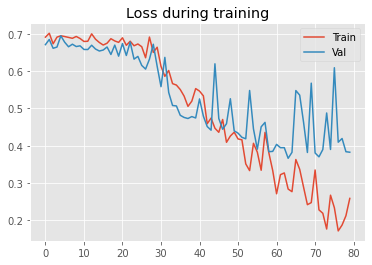

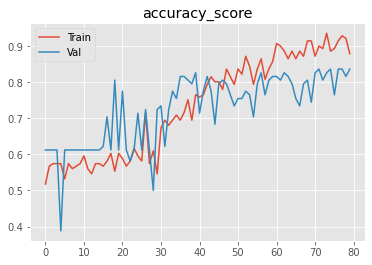

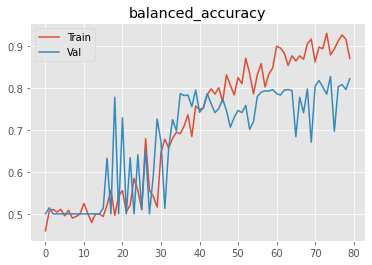

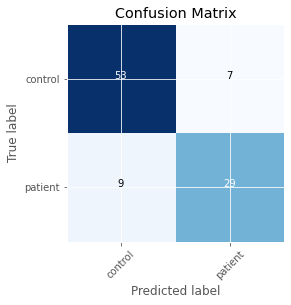

###### Starting inner fold 4
{'model': 'ModelA', 'batch_size': 4, 'patience': 12, 'lr': 0.0001}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69072
[0,    20] loss: 0.69172
[0,    30] loss: 0.69228
Time elapsed: 0h:0m:1s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.22 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.676162
[1,    10] loss: 0.66102
[1,    20] loss: 0.71344
[1,    30] loss: 0.71401
Time elapsed: 0h:0m:4s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.43 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.689862
[2,    10] loss: 0.68883
[2,    20] loss: 0.69253
[2,    30] loss: 0.68737
Time elapsed: 0h:0m:7s
train accuracy_score: 54.61 %
train balanced_accuracy: 47.53 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.674825
[3,    10] loss: 0.69220
[3,    20] loss: 0.68911
[3,    30] loss: 0.64612
Time elapsed: 0h:0m:9s
train accuracy_score: 56.74 %
tra

Time elapsed: 0h:1m:29s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.656615
[34,    10] loss: 0.66420
[34,    20] loss: 0.64154
[34,    30] loss: 0.69028
Time elapsed: 0h:1m:32s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.650088
[35,    10] loss: 0.70216
[35,    20] loss: 0.69108
[35,    30] loss: 0.65811
Time elapsed: 0h:1m:35s
train accuracy_score: 56.74 %
train balanced_accuracy: 51.33 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.655179
[36,    10] loss: 0.69998
[36,    20] loss: 0.66593
[36,    30] loss: 0.66031
Time elapsed: 0h:1m:37s
train accuracy_score: 57.45 %
train balanced_accuracy: 50.00 %
val accuracy_score: 61.22 %
val balanced_accuracy: 50.00 %
Val loss: 0.651743
[37,    10] loss: 0.69504
[37,    20] loss: 0.67496
[37,    30] loss: 0.65047
Time elapsed: 0h:1m:40s
trai

[67,    20] loss: 0.41992
[67,    30] loss: 0.50598
Time elapsed: 0h:3m:0s
train accuracy_score: 77.30 %
train balanced_accuracy: 75.93 %
val accuracy_score: 77.55 %
val balanced_accuracy: 72.98 %
Val loss: 0.518787
[68,    10] loss: 0.56528
[68,    20] loss: 0.42000
[68,    30] loss: 0.62762
Time elapsed: 0h:3m:2s
train accuracy_score: 75.18 %
train balanced_accuracy: 72.56 %
val accuracy_score: 68.37 %
val balanced_accuracy: 68.38 %
Val loss: 0.517473
[69,    10] loss: 0.56406
[69,    20] loss: 0.43979
[69,    30] loss: 0.48422
Time elapsed: 0h:3m:5s
train accuracy_score: 77.30 %
train balanced_accuracy: 76.14 %
val accuracy_score: 71.43 %
val balanced_accuracy: 73.29 %
Val loss: 0.565199
[70,    10] loss: 0.57949
[70,    20] loss: 0.50918
[70,    30] loss: 0.46019
Time elapsed: 0h:3m:8s
train accuracy_score: 72.34 %
train balanced_accuracy: 70.74 %
val accuracy_score: 79.59 %
val balanced_accuracy: 75.61 %
Val loss: 0.495577
[71,    10] loss: 0.53266
[71,    20] loss: 0.59473
[71,  

[101,    10] loss: 0.39741
[101,    20] loss: 0.50605
[101,    30] loss: 0.32799
Time elapsed: 0h:4m:32s
train accuracy_score: 80.14 %
train balanced_accuracy: 79.04 %
val accuracy_score: 75.51 %
val balanced_accuracy: 74.69 %
Val loss: 0.451000
[102,    10] loss: 0.52482
[102,    20] loss: 0.31522
[102,    30] loss: 0.41061
Time elapsed: 0h:4m:34s
train accuracy_score: 81.56 %
train balanced_accuracy: 80.28 %
val accuracy_score: 78.57 %
val balanced_accuracy: 82.50 %
Val loss: 0.587725
[103,    10] loss: 0.30955
[103,    20] loss: 0.54301
[103,    30] loss: 0.45920
Time elapsed: 0h:4m:37s
train accuracy_score: 81.56 %
train balanced_accuracy: 80.71 %
val accuracy_score: 77.55 %
val balanced_accuracy: 72.50 %
Val loss: 0.449037
[104,    10] loss: 0.37743
[104,    20] loss: 0.45468
[104,    30] loss: 0.39289
Time elapsed: 0h:4m:40s
train accuracy_score: 83.69 %
train balanced_accuracy: 83.43 %
val accuracy_score: 79.59 %
val balanced_accuracy: 76.10 %
Val loss: 0.426019
[105,    10] los

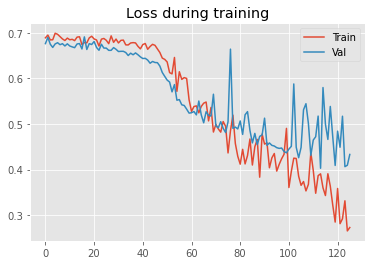

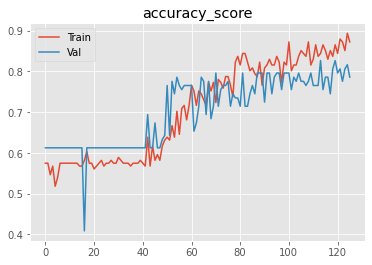

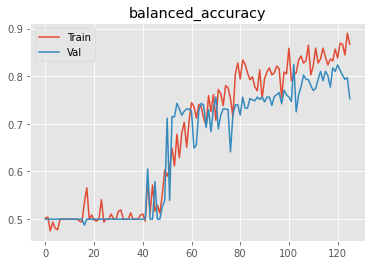

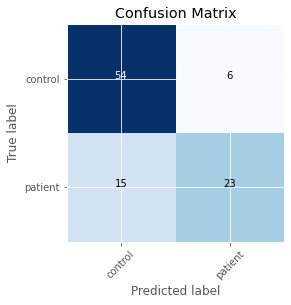

Finished outer fold.
{'final_acc': 0.8232456140350877, 'best_acc': 0.8280701754385965, 'final_iter': 80, 'best_iter': 75, 'params': {'model': 'ModelB', 'batch_size': 6, 'patience': 16, 'lr': 0.0001}, 'inner_fold_idx': 3}
###### Starting outer fold 4
# of patients 117, # of healthy controls 126
139
104
###### Starting inner fold 0
{'model': 'ModelA', 'batch_size': 4, 'patience': 16, 'lr': 0.0001}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.70392
[0,    20] loss: 0.69275
[0,    30] loss: 0.69716
Time elapsed: 0h:0m:1s
train accuracy_score: 51.08 %
train balanced_accuracy: 51.20 %
val accuracy_score: 45.19 %
val balanced_accuracy: 50.00 %
Val loss: 0.693120
[1,    10] loss: 0.69710
[1,    20] loss: 0.69975
[1,    30] loss: 0.69093
Time elapsed: 0h:0m:4s
train accuracy_score: 53.96 %
train balanced_accuracy: 54.07 %
val accuracy_score: 49.04 %
val balanced_accuracy: 45.48 %
Val loss: 0.692190
[2,    10] loss: 0.69209
[2,    20] loss: 0.71018
[2,    30] loss: 

[32,    10] loss: 0.66722
[32,    20] loss: 0.68265
[32,    30] loss: 0.69475
Time elapsed: 0h:1m:28s
train accuracy_score: 66.19 %
train balanced_accuracy: 66.31 %
val accuracy_score: 61.54 %
val balanced_accuracy: 59.13 %
Val loss: 0.673665
[33,    10] loss: 0.67394
[33,    20] loss: 0.64744
[33,    30] loss: 0.70634
Time elapsed: 0h:1m:31s
train accuracy_score: 61.15 %
train balanced_accuracy: 61.20 %
val accuracy_score: 47.12 %
val balanced_accuracy: 51.75 %
Val loss: 0.682328
[34,    10] loss: 0.71514
[34,    20] loss: 0.70126
[34,    30] loss: 0.66004
Time elapsed: 0h:1m:34s
train accuracy_score: 53.96 %
train balanced_accuracy: 53.89 %
val accuracy_score: 68.27 %
val balanced_accuracy: 71.05 %
Val loss: 0.678106
[35,    10] loss: 0.66787
[35,    20] loss: 0.63680
[35,    30] loss: 0.70873
Time elapsed: 0h:1m:37s
train accuracy_score: 62.59 %
train balanced_accuracy: 62.63 %
val accuracy_score: 74.04 %
val balanced_accuracy: 74.45 %
Val loss: 0.664478
[36,    10] loss: 0.66224
[3

[66,    10] loss: 0.47108
[66,    20] loss: 0.46594
[66,    30] loss: 0.62710
Time elapsed: 0h:3m:1s
train accuracy_score: 73.38 %
train balanced_accuracy: 73.40 %
val accuracy_score: 75.96 %
val balanced_accuracy: 76.76 %
Val loss: 0.527574
[67,    10] loss: 0.48891
[67,    20] loss: 0.55909
[67,    30] loss: 0.50733
Time elapsed: 0h:3m:4s
train accuracy_score: 76.98 %
train balanced_accuracy: 76.98 %
val accuracy_score: 75.96 %
val balanced_accuracy: 77.32 %
Val loss: 0.538644
[68,    10] loss: 0.50785
[68,    20] loss: 0.61582
[68,    30] loss: 0.53618
Time elapsed: 0h:3m:6s
train accuracy_score: 69.78 %
train balanced_accuracy: 69.77 %
val accuracy_score: 71.15 %
val balanced_accuracy: 71.44 %
Val loss: 0.531118
[69,    10] loss: 0.60749
[69,    20] loss: 0.48003
[69,    30] loss: 0.47546
Time elapsed: 0h:3m:9s
train accuracy_score: 74.82 %
train balanced_accuracy: 74.82 %
val accuracy_score: 75.00 %
val balanced_accuracy: 75.70 %
Val loss: 0.548349
[70,    10] loss: 0.54487
[70,  

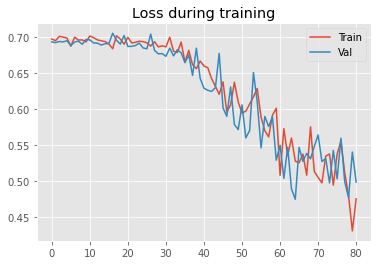

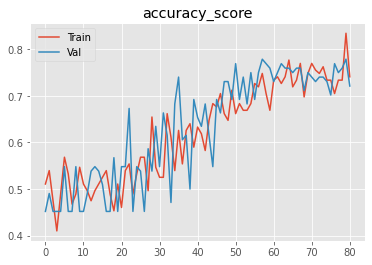

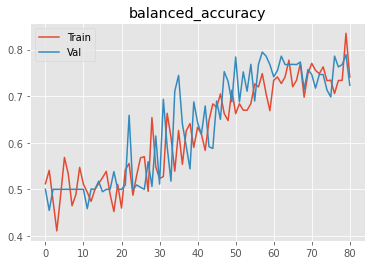

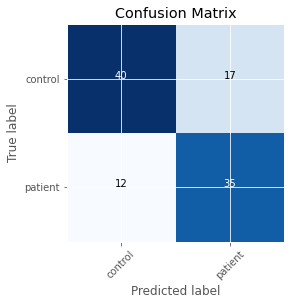

###### Starting inner fold 1
{'model': 'ModelA', 'batch_size': 4, 'patience': 16, 'lr': 0.0001}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69728
[0,    20] loss: 0.69343
[0,    30] loss: 0.70032
Time elapsed: 0h:0m:1s
train accuracy_score: 56.12 %
train balanced_accuracy: 56.00 %
val accuracy_score: 54.81 %
val balanced_accuracy: 50.00 %
Val loss: 0.689205
[1,    10] loss: 0.70022
[1,    20] loss: 0.70142
[1,    30] loss: 0.71304
Time elapsed: 0h:0m:4s
train accuracy_score: 46.04 %
train balanced_accuracy: 46.06 %
val accuracy_score: 49.04 %
val balanced_accuracy: 46.23 %
Val loss: 0.692892
[2,    10] loss: 0.69094
[2,    20] loss: 0.70076
[2,    30] loss: 0.70146
Time elapsed: 0h:0m:6s
train accuracy_score: 46.76 %
train balanced_accuracy: 46.68 %
val accuracy_score: 45.19 %
val balanced_accuracy: 50.00 %
Val loss: 0.695768
[3,    10] loss: 0.69733
[3,    20] loss: 0.69585
[3,    30] loss: 0.69276
Time elapsed: 0h:0m:9s
train accuracy_score: 48.20 %
tra

Time elapsed: 0h:1m:28s
train accuracy_score: 57.55 %
train balanced_accuracy: 57.73 %
val accuracy_score: 57.69 %
val balanced_accuracy: 54.50 %
Val loss: 0.681571
[34,    10] loss: 0.69111
[34,    20] loss: 0.67742
[34,    30] loss: 0.69963
Time elapsed: 0h:1m:31s
train accuracy_score: 48.20 %
train balanced_accuracy: 47.92 %
val accuracy_score: 63.46 %
val balanced_accuracy: 62.37 %
Val loss: 0.681829
[35,    10] loss: 0.66892
[35,    20] loss: 0.68802
[35,    30] loss: 0.67762
Time elapsed: 0h:1m:33s
train accuracy_score: 60.43 %
train balanced_accuracy: 60.61 %
val accuracy_score: 63.46 %
val balanced_accuracy: 62.93 %
Val loss: 0.675936
[36,    10] loss: 0.69702
[36,    20] loss: 0.68451
[36,    30] loss: 0.67035
Time elapsed: 0h:1m:36s
train accuracy_score: 55.40 %
train balanced_accuracy: 55.31 %
val accuracy_score: 57.69 %
val balanced_accuracy: 53.75 %
Val loss: 0.671659
[37,    10] loss: 0.67576
[37,    20] loss: 0.65199
[37,    30] loss: 0.67142
Time elapsed: 0h:1m:39s
trai

[67,    20] loss: 0.59737
[67,    30] loss: 0.40780
Time elapsed: 0h:3m:1s
train accuracy_score: 79.14 %
train balanced_accuracy: 79.13 %
val accuracy_score: 77.88 %
val balanced_accuracy: 76.84 %
Val loss: 0.468187
[68,    10] loss: 0.48733
[68,    20] loss: 0.37014
[68,    30] loss: 0.36879
Time elapsed: 0h:3m:3s
train accuracy_score: 79.14 %
train balanced_accuracy: 79.16 %
val accuracy_score: 77.88 %
val balanced_accuracy: 79.08 %
Val loss: 0.488114
[69,    10] loss: 0.63857
[69,    20] loss: 0.40370
[69,    30] loss: 0.52246
Time elapsed: 0h:3m:6s
train accuracy_score: 73.38 %
train balanced_accuracy: 73.32 %
val accuracy_score: 75.96 %
val balanced_accuracy: 76.02 %
Val loss: 0.443875
[70,    10] loss: 0.62258
[70,    20] loss: 0.37744
[70,    30] loss: 0.40962
Time elapsed: 0h:3m:9s
train accuracy_score: 80.58 %
train balanced_accuracy: 80.58 %
val accuracy_score: 75.00 %
val balanced_accuracy: 75.14 %
Val loss: 0.450893
[71,    10] loss: 0.42616
[71,    20] loss: 0.36952
[71,  

[101,    10] loss: 0.23008
[101,    20] loss: 0.37862
[101,    30] loss: 0.38147
Time elapsed: 0h:4m:31s
train accuracy_score: 87.05 %
train balanced_accuracy: 87.05 %
val accuracy_score: 81.73 %
val balanced_accuracy: 82.03 %
Val loss: 0.375953
[102,    10] loss: 0.22270
[102,    20] loss: 0.34448
[102,    30] loss: 0.37141
Time elapsed: 0h:4m:34s
train accuracy_score: 85.61 %
train balanced_accuracy: 85.61 %
val accuracy_score: 81.73 %
val balanced_accuracy: 82.03 %
Val loss: 0.393926
[103,    10] loss: 0.26678
[103,    20] loss: 0.29523
[103,    30] loss: 0.29438
Time elapsed: 0h:4m:37s
train accuracy_score: 87.77 %
train balanced_accuracy: 87.74 %
val accuracy_score: 83.65 %
val balanced_accuracy: 84.53 %
Val loss: 0.437146
[104,    10] loss: 0.32123
[104,    20] loss: 0.34837
[104,    30] loss: 0.22148
Time elapsed: 0h:4m:39s
train accuracy_score: 86.33 %
train balanced_accuracy: 86.31 %
val accuracy_score: 78.85 %
val balanced_accuracy: 78.65 %
Val loss: 0.395746
[105,    10] los

val accuracy_score: 84.62 %
val balanced_accuracy: 85.41 %
Val loss: 0.478648
[135,    10] loss: 0.18117
[135,    20] loss: 0.25779
[135,    30] loss: 0.19662
Time elapsed: 0h:6m:4s
train accuracy_score: 90.65 %
train balanced_accuracy: 90.65 %
val accuracy_score: 84.62 %
val balanced_accuracy: 85.03 %
Val loss: 0.368497
[136,    10] loss: 0.23277
[136,    20] loss: 0.16095
[136,    30] loss: 0.26101
Time elapsed: 0h:6m:6s
train accuracy_score: 89.93 %
train balanced_accuracy: 89.93 %
val accuracy_score: 84.62 %
val balanced_accuracy: 85.22 %
Val loss: 0.379826
[137,    10] loss: 0.18918
[137,    20] loss: 0.23949
[137,    30] loss: 0.27826
Time elapsed: 0h:6m:9s
train accuracy_score: 89.93 %
train balanced_accuracy: 89.92 %
val accuracy_score: 85.58 %
val balanced_accuracy: 85.54 %
Val loss: 0.354298
[138,    10] loss: 0.16860
[138,    20] loss: 0.15277
[138,    30] loss: 0.13604
Time elapsed: 0h:6m:12s
train accuracy_score: 95.68 %
train balanced_accuracy: 95.68 %
val accuracy_score:

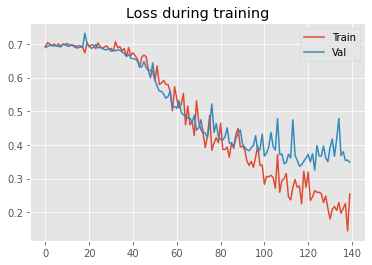

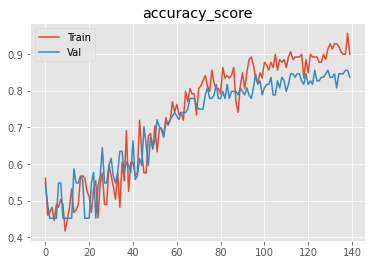

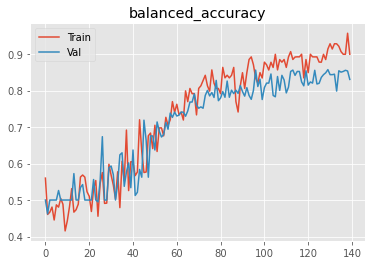

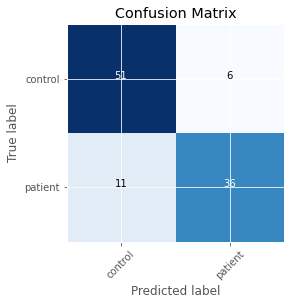

###### Starting inner fold 2
{'model': 'ModelB', 'batch_size': 12, 'patience': 16, 'lr': 0.0001}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.69852
Time elapsed: 0h:0m:2s
train accuracy_score: 50.36 %
train balanced_accuracy: 50.58 %
val accuracy_score: 45.19 %
val balanced_accuracy: 50.00 %
Val loss: 0.696038
[1,    10] loss: 0.69434
Time elapsed: 0h:0m:5s
train accuracy_score: 48.20 %
train balanced_accuracy: 47.94 %
val accuracy_score: 54.81 %
val balanced_accuracy: 50.00 %
Val loss: 0.689820
[2,    10] loss: 0.69947
Time elapsed: 0h:0m:9s
train accuracy_score: 51.08 %
train balanced_accuracy: 51.40 %
val accuracy_score: 54.81 %
val balanced_accuracy: 50.00 %
Val loss: 0.690951
[3,    10] loss: 0.69537
Time elapsed: 0h:0m:12s
train accuracy_score: 51.80 %
train balanced_accuracy: 51.93 %
val accuracy_score: 54.81 %
val balanced_accuracy: 50.00 %
Val loss: 0.690802
[4,    10] loss: 0.69619
Time elapsed: 0h:0m:16s
train accuracy_score: 51.08 %
train balan

val accuracy_score: 73.08 %
val balanced_accuracy: 71.15 %
Val loss: 0.566825
[43,    10] loss: 0.62130
Time elapsed: 0h:2m:34s
train accuracy_score: 66.91 %
train balanced_accuracy: 66.80 %
val accuracy_score: 63.46 %
val balanced_accuracy: 60.51 %
Val loss: 0.593302
[44,    10] loss: 0.58093
Time elapsed: 0h:2m:38s
train accuracy_score: 71.22 %
train balanced_accuracy: 71.26 %
val accuracy_score: 75.00 %
val balanced_accuracy: 73.83 %
Val loss: 0.531459
[45,    10] loss: 0.55179
Time elapsed: 0h:2m:41s
train accuracy_score: 72.66 %
train balanced_accuracy: 72.67 %
val accuracy_score: 78.85 %
val balanced_accuracy: 78.09 %
Val loss: 0.509467
[46,    10] loss: 0.50737
Time elapsed: 0h:2m:45s
train accuracy_score: 74.82 %
train balanced_accuracy: 74.79 %
val accuracy_score: 65.38 %
val balanced_accuracy: 62.64 %
Val loss: 0.568939
[47,    10] loss: 0.53579
Time elapsed: 0h:2m:48s
train accuracy_score: 79.86 %
train balanced_accuracy: 79.84 %
val accuracy_score: 80.77 %
val balanced_accu

val accuracy_score: 79.81 %
val balanced_accuracy: 81.21 %
Val loss: 0.390022
[86,    10] loss: 0.39372
Time elapsed: 0h:5m:7s
train accuracy_score: 82.73 %
train balanced_accuracy: 82.72 %
val accuracy_score: 84.62 %
val balanced_accuracy: 83.91 %
Val loss: 0.328775
[87,    10] loss: 0.28696
Time elapsed: 0h:5m:10s
train accuracy_score: 89.93 %
train balanced_accuracy: 89.93 %
val accuracy_score: 88.46 %
val balanced_accuracy: 87.42 %
Val loss: 0.306780
[88,    10] loss: 0.28334
Time elapsed: 0h:5m:14s
train accuracy_score: 89.93 %
train balanced_accuracy: 89.91 %
val accuracy_score: 88.46 %
val balanced_accuracy: 87.23 %
Val loss: 0.283368
[89,    10] loss: 0.27672
Time elapsed: 0h:5m:17s
train accuracy_score: 88.49 %
train balanced_accuracy: 88.52 %
val accuracy_score: 84.62 %
val balanced_accuracy: 82.98 %
Val loss: 0.317000
[90,    10] loss: 0.32479
Time elapsed: 0h:5m:20s
train accuracy_score: 87.05 %
train balanced_accuracy: 87.07 %
val accuracy_score: 91.35 %
val balanced_accur

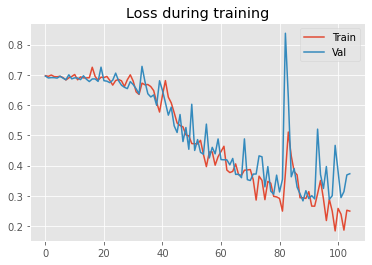

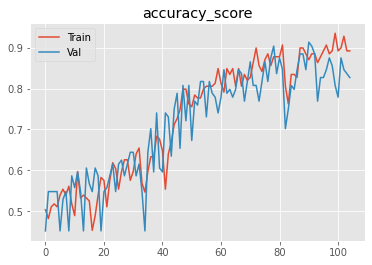

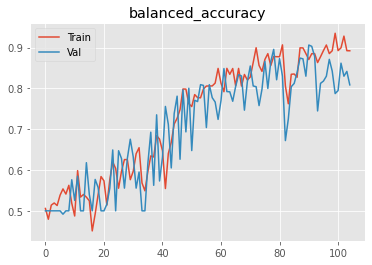

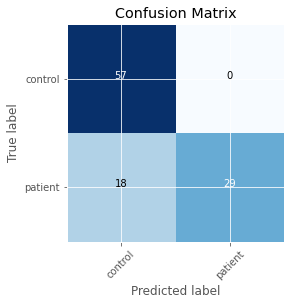

###### Starting inner fold 3
{'model': 'ModelB', 'batch_size': 4, 'patience': 16, 'lr': 5e-05}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.69710
[0,    20] loss: 0.71505
[0,    30] loss: 0.69677
Time elapsed: 0h:0m:2s
train accuracy_score: 41.73 %
train balanced_accuracy: 42.00 %
val accuracy_score: 54.81 %
val balanced_accuracy: 50.00 %
Val loss: 0.690770
[1,    10] loss: 0.68637
[1,    20] loss: 0.68142
[1,    30] loss: 0.73030
Time elapsed: 0h:0m:5s
train accuracy_score: 48.92 %
train balanced_accuracy: 49.28 %
val accuracy_score: 54.81 %
val balanced_accuracy: 50.00 %
Val loss: 0.691339
[2,    10] loss: 0.69581
[2,    20] loss: 0.68898
[2,    30] loss: 0.70410
Time elapsed: 0h:0m:8s
train accuracy_score: 46.04 %
train balanced_accuracy: 46.36 %
val accuracy_score: 54.81 %
val balanced_accuracy: 50.00 %
Val loss: 0.690355
[3,    10] loss: 0.69357
[3,    20] loss: 0.69445
[3,    30] loss: 0.69937
Time elapsed: 0h:0m:12s
train accuracy_score: 48.92 %
tra

Time elapsed: 0h:1m:54s
train accuracy_score: 69.78 %
train balanced_accuracy: 69.81 %
val accuracy_score: 72.12 %
val balanced_accuracy: 73.07 %
Val loss: 0.527910
[34,    10] loss: 0.56301
[34,    20] loss: 0.58868
[34,    30] loss: 0.52892
Time elapsed: 0h:1m:58s
train accuracy_score: 74.10 %
train balanced_accuracy: 74.10 %
val accuracy_score: 78.85 %
val balanced_accuracy: 78.46 %
Val loss: 0.495643
[35,    10] loss: 0.58234
[35,    20] loss: 0.48932
[35,    30] loss: 0.50291
Time elapsed: 0h:2m:1s
train accuracy_score: 74.10 %
train balanced_accuracy: 74.15 %
val accuracy_score: 79.81 %
val balanced_accuracy: 79.15 %
Val loss: 0.484049
[36,    10] loss: 0.47546
[36,    20] loss: 0.50217
[36,    30] loss: 0.51681
Time elapsed: 0h:2m:5s
train accuracy_score: 74.82 %
train balanced_accuracy: 74.77 %
val accuracy_score: 82.69 %
val balanced_accuracy: 81.78 %
Val loss: 0.470852
[37,    10] loss: 0.43509
[37,    20] loss: 0.48000
[37,    30] loss: 0.56910
Time elapsed: 0h:2m:8s
train a

[67,    20] loss: 0.40342
[67,    30] loss: 0.27161
Time elapsed: 0h:3m:51s
train accuracy_score: 87.05 %
train balanced_accuracy: 87.07 %
val accuracy_score: 81.73 %
val balanced_accuracy: 81.84 %
Val loss: 0.346288
[68,    10] loss: 0.26944
[68,    20] loss: 0.39083
[68,    30] loss: 0.33703
Time elapsed: 0h:3m:54s
train accuracy_score: 87.77 %
train balanced_accuracy: 87.77 %
val accuracy_score: 82.69 %
val balanced_accuracy: 82.90 %
Val loss: 0.341454
[69,    10] loss: 0.30295
[69,    20] loss: 0.38652
[69,    30] loss: 0.27951
Time elapsed: 0h:3m:57s
train accuracy_score: 87.05 %
train balanced_accuracy: 87.06 %
val accuracy_score: 81.73 %
val balanced_accuracy: 80.91 %
Val loss: 0.336582
[70,    10] loss: 0.24939
[70,    20] loss: 0.38539
[70,    30] loss: 0.33787
Time elapsed: 0h:4m:1s
train accuracy_score: 87.05 %
train balanced_accuracy: 87.06 %
val accuracy_score: 82.69 %
val balanced_accuracy: 82.53 %
Val loss: 0.366649
[71,    10] loss: 0.25139
[71,    20] loss: 0.35301
[71

[101,    10] loss: 0.21734
[101,    20] loss: 0.18187
[101,    30] loss: 0.15918
Time elapsed: 0h:5m:47s
train accuracy_score: 93.53 %
train balanced_accuracy: 93.52 %
val accuracy_score: 89.42 %
val balanced_accuracy: 88.48 %
Val loss: 0.267195
[102,    10] loss: 0.17063
[102,    20] loss: 0.15234
[102,    30] loss: 0.26937
Time elapsed: 0h:5m:50s
train accuracy_score: 89.93 %
train balanced_accuracy: 89.91 %
val accuracy_score: 85.58 %
val balanced_accuracy: 84.23 %
Val loss: 0.303757
[103,    10] loss: 0.16943
[103,    20] loss: 0.23875
[103,    30] loss: 0.10878
Time elapsed: 0h:5m:54s
train accuracy_score: 94.96 %
train balanced_accuracy: 94.96 %
val accuracy_score: 88.46 %
val balanced_accuracy: 88.91 %
Val loss: 0.277572
Early stopping in epoch 104
Total time elapsed: 0h:5m:55s
Writing model to disk...
Best result during training: 0.90. Saving model..
Finished inner fold.


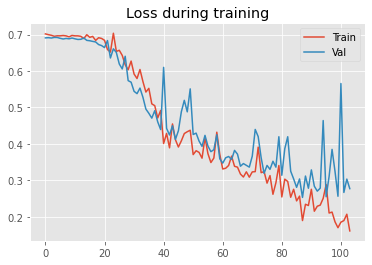

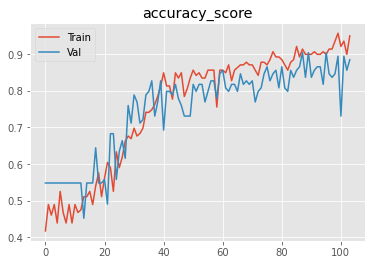

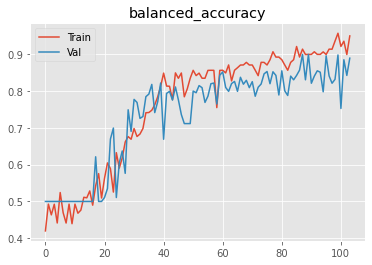

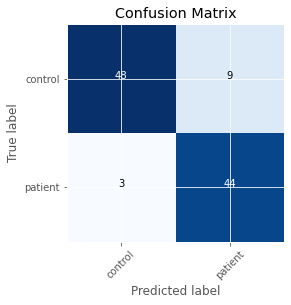

###### Starting inner fold 4
{'model': 'ModelB', 'batch_size': 12, 'patience': 16, 'lr': 5e-05}
Picking model ModelB
Trainable model parameters: 499845
[0,    10] loss: 0.69540
Time elapsed: 0h:0m:2s
train accuracy_score: 48.92 %
train balanced_accuracy: 49.21 %
val accuracy_score: 54.81 %
val balanced_accuracy: 50.00 %
Val loss: 0.691338
[1,    10] loss: 0.69034
Time elapsed: 0h:0m:5s
train accuracy_score: 52.52 %
train balanced_accuracy: 52.73 %
val accuracy_score: 45.19 %
val balanced_accuracy: 50.00 %
Val loss: 0.693304
[2,    10] loss: 0.69237
Time elapsed: 0h:0m:8s
train accuracy_score: 48.20 %
train balanced_accuracy: 48.03 %
val accuracy_score: 58.65 %
val balanced_accuracy: 58.73 %
Val loss: 0.692559
[3,    10] loss: 0.69028
Time elapsed: 0h:0m:12s
train accuracy_score: 51.08 %
train balanced_accuracy: 51.09 %
val accuracy_score: 55.77 %
val balanced_accuracy: 52.37 %
Val loss: 0.691288
[4,    10] loss: 0.69923
Time elapsed: 0h:0m:15s
train accuracy_score: 52.52 %
train balanc

val accuracy_score: 63.46 %
val balanced_accuracy: 61.07 %
Val loss: 0.625378
[43,    10] loss: 0.58810
Time elapsed: 0h:2m:28s
train accuracy_score: 69.06 %
train balanced_accuracy: 69.07 %
val accuracy_score: 63.46 %
val balanced_accuracy: 61.25 %
Val loss: 0.622319
[44,    10] loss: 0.66677
Time elapsed: 0h:2m:32s
train accuracy_score: 66.19 %
train balanced_accuracy: 66.19 %
val accuracy_score: 64.42 %
val balanced_accuracy: 62.32 %
Val loss: 0.614810
[45,    10] loss: 0.59636
Time elapsed: 0h:2m:35s
train accuracy_score: 67.63 %
train balanced_accuracy: 67.75 %
val accuracy_score: 65.38 %
val balanced_accuracy: 67.11 %
Val loss: 0.633947
[46,    10] loss: 0.66044
Time elapsed: 0h:2m:38s
train accuracy_score: 65.47 %
train balanced_accuracy: 65.24 %
val accuracy_score: 60.58 %
val balanced_accuracy: 57.32 %
Val loss: 0.629026
[47,    10] loss: 0.64904
Time elapsed: 0h:2m:42s
train accuracy_score: 62.59 %
train balanced_accuracy: 62.78 %
val accuracy_score: 63.46 %
val balanced_accu

val accuracy_score: 77.88 %
val balanced_accuracy: 76.47 %
Val loss: 0.457706
[86,    10] loss: 0.43259
Time elapsed: 0h:4m:51s
train accuracy_score: 82.73 %
train balanced_accuracy: 82.73 %
val accuracy_score: 77.88 %
val balanced_accuracy: 76.47 %
Val loss: 0.445612
[87,    10] loss: 0.45014
Time elapsed: 0h:4m:55s
train accuracy_score: 80.58 %
train balanced_accuracy: 80.65 %
val accuracy_score: 80.77 %
val balanced_accuracy: 79.66 %
Val loss: 0.448155
[88,    10] loss: 0.45339
Time elapsed: 0h:4m:58s
train accuracy_score: 78.42 %
train balanced_accuracy: 78.33 %
val accuracy_score: 67.31 %
val balanced_accuracy: 64.76 %
Val loss: 0.618405
[89,    10] loss: 0.49673
Time elapsed: 0h:5m:1s
train accuracy_score: 79.14 %
train balanced_accuracy: 79.16 %
val accuracy_score: 80.77 %
val balanced_accuracy: 79.84 %
Val loss: 0.424514
[90,    10] loss: 0.44720
Time elapsed: 0h:5m:4s
train accuracy_score: 82.73 %
train balanced_accuracy: 82.76 %
val accuracy_score: 79.81 %
val balanced_accura

val accuracy_score: 79.81 %
val balanced_accuracy: 78.59 %
Val loss: 0.374406
[129,    10] loss: 0.35181
Time elapsed: 0h:7m:15s
train accuracy_score: 88.49 %
train balanced_accuracy: 88.51 %
val accuracy_score: 88.46 %
val balanced_accuracy: 87.79 %
Val loss: 0.315837
[130,    10] loss: 0.31308
Time elapsed: 0h:7m:18s
train accuracy_score: 84.89 %
train balanced_accuracy: 84.86 %
val accuracy_score: 80.77 %
val balanced_accuracy: 78.72 %
Val loss: 0.443840
[131,    10] loss: 0.35146
Time elapsed: 0h:7m:21s
train accuracy_score: 85.61 %
train balanced_accuracy: 85.63 %
val accuracy_score: 86.54 %
val balanced_accuracy: 85.67 %
Val loss: 0.323563
[132,    10] loss: 0.29004
Time elapsed: 0h:7m:25s
train accuracy_score: 89.21 %
train balanced_accuracy: 89.21 %
val accuracy_score: 82.69 %
val balanced_accuracy: 81.04 %
Val loss: 0.336782
[133,    10] loss: 0.34626
Time elapsed: 0h:7m:28s
train accuracy_score: 83.45 %
train balanced_accuracy: 83.47 %
val accuracy_score: 91.35 %
val balanced

val accuracy_score: 92.31 %
val balanced_accuracy: 91.68 %
Val loss: 0.257006
[172,    10] loss: 0.21844
Time elapsed: 0h:9m:39s
train accuracy_score: 92.09 %
train balanced_accuracy: 92.11 %
val accuracy_score: 89.42 %
val balanced_accuracy: 88.48 %
Val loss: 0.260067
[173,    10] loss: 0.24905
Time elapsed: 0h:9m:42s
train accuracy_score: 90.65 %
train balanced_accuracy: 90.63 %
val accuracy_score: 83.65 %
val balanced_accuracy: 81.91 %
Val loss: 0.300428
[174,    10] loss: 0.29338
Time elapsed: 0h:9m:45s
train accuracy_score: 87.05 %
train balanced_accuracy: 87.04 %
val accuracy_score: 85.58 %
val balanced_accuracy: 84.04 %
Val loss: 0.285440
[175,    10] loss: 0.20857
Time elapsed: 0h:9m:49s
train accuracy_score: 89.93 %
train balanced_accuracy: 89.96 %
val accuracy_score: 93.27 %
val balanced_accuracy: 92.74 %
Val loss: 0.258824
[176,    10] loss: 0.25818
Time elapsed: 0h:9m:52s
train accuracy_score: 92.81 %
train balanced_accuracy: 92.80 %
val accuracy_score: 84.62 %
val balanced

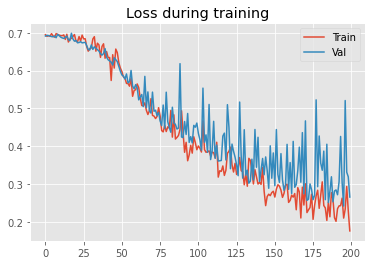

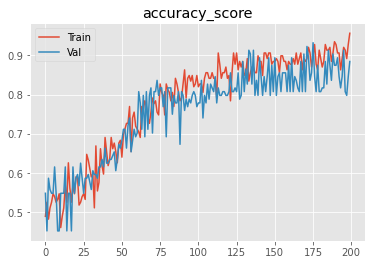

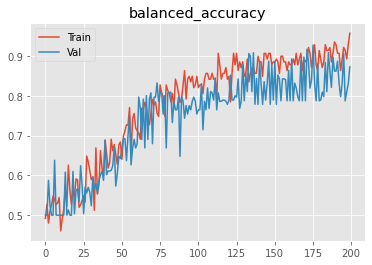

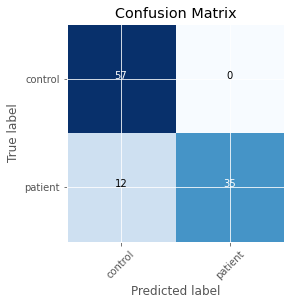

Finished outer fold.
{'final_acc': 0.8891377379619261, 'best_acc': 0.8992161254199329, 'final_iter': 104, 'best_iter': 90, 'params': {'model': 'ModelB', 'batch_size': 4, 'patience': 16, 'lr': 5e-05}, 'inner_fold_idx': 3}
###### Starting outer fold 5
# of patients 125, # of healthy controls 126
136
115
###### Starting inner fold 0
{'model': 'ModelA', 'batch_size': 12, 'patience': 12, 'lr': 5e-05}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.69333
Time elapsed: 0h:0m:1s
train accuracy_score: 52.94 %
train balanced_accuracy: 55.61 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.698111
[1,    10] loss: 0.69369
Time elapsed: 0h:0m:3s
train accuracy_score: 54.41 %
train balanced_accuracy: 50.26 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.712389
[2,    10] loss: 0.68163
Time elapsed: 0h:0m:6s
train accuracy_score: 57.35 %
train balanced_accuracy: 52.72 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00

[41,    10] loss: 0.67996
Time elapsed: 0h:1m:45s
train accuracy_score: 55.88 %
train balanced_accuracy: 50.00 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.712332
[42,    10] loss: 0.68793
Time elapsed: 0h:1m:47s
train accuracy_score: 56.62 %
train balanced_accuracy: 50.83 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.713125
[43,    10] loss: 0.68583
Time elapsed: 0h:1m:50s
train accuracy_score: 54.41 %
train balanced_accuracy: 48.68 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.716915
[44,    10] loss: 0.68867
Time elapsed: 0h:1m:52s
train accuracy_score: 55.88 %
train balanced_accuracy: 50.00 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.707766
[45,    10] loss: 0.68079
Time elapsed: 0h:1m:55s
train accuracy_score: 55.15 %
train balanced_accuracy: 49.52 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.710530
[46,    10] loss: 0.68502
Time elapsed: 0h:1m

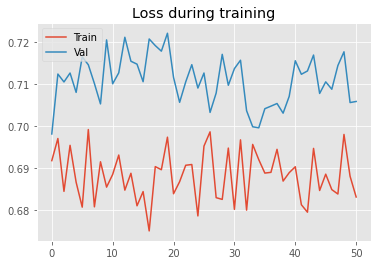

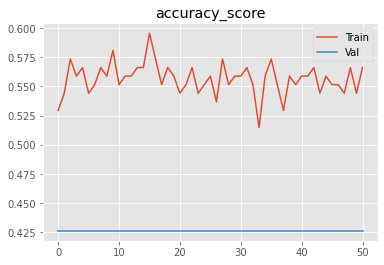

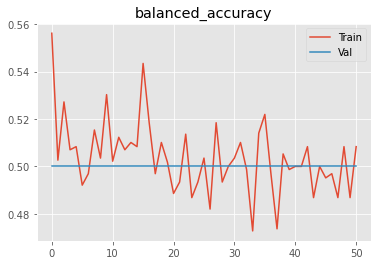

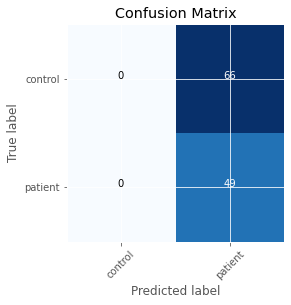

###### Starting inner fold 1
{'model': 'ModelA', 'batch_size': 4, 'patience': 16, 'lr': 0.0001}
Picking model ModelA
Trainable model parameters: 238997
[0,    10] loss: 0.70137
[0,    20] loss: 0.69376
[0,    30] loss: 0.68472
Time elapsed: 0h:0m:1s
train accuracy_score: 50.00 %
train balanced_accuracy: 49.65 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.707391
[1,    10] loss: 0.67749
[1,    20] loss: 0.68874
[1,    30] loss: 0.69912
Time elapsed: 0h:0m:3s
train accuracy_score: 56.62 %
train balanced_accuracy: 50.83 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.714327
[2,    10] loss: 0.69693
[2,    20] loss: 0.70534
[2,    30] loss: 0.69562
Time elapsed: 0h:0m:6s
train accuracy_score: 47.06 %
train balanced_accuracy: 42.98 %
val accuracy_score: 42.61 %
val balanced_accuracy: 50.00 %
Val loss: 0.699943
[3,    10] loss: 0.71046
[3,    20] loss: 0.70060
[3,    30] loss: 0.68244
Time elapsed: 0h:0m:8s
train accuracy_score: 51.47 %
tra

KeyboardInterrupt: 

In [7]:
fold_metric, models, all_outer_bests = run(data=None,
                  k_folds=-1,
                  output_dir=output_dir,
                  augmentations=augmentations,
                  hyperparams=hyperparams,
                  dataset=dataset,
                  experiment=experiment,
                  shape=-1,
                  train_data_path=train_data_path,
                  masked=False,
                  zero_one_normalize=False,
                  metrics=metrics,
                  subset_only=True,
                  num_epochs=num_epochs,
                  retain_metric=retain_metric,
                  b=None,
                  wd=1e-4,
                  ignore_epochs=35,
                  gpu=gpu,
                  show_train_steps=10
                 )

print(np.mean(fold_metric))
print(np.std(fold_metric))

# Inference

In [ ]:
metrics_df = run_inference(all_outer_bests, train_data_path, output_dir=output_dir, dataset=dataset, experiment=experiment, gpu=gpu, zero_one_normalize=False)